<a href="https://colab.research.google.com/github/dmejiaho/TAM-2025-2/blob/main/Parcial_1_TAM_2025_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Integrantes :



##Luis Fernando Castro Buchelly
##Diego Fernando Erazo Ciceri
##Daniel Mauricio Mejia Hoyos



#  Punto 1 — Modelos de Regresión Lineal y sus Extensiones
##Para ver los procedimentos completos ir a :https://github.com/dmejiaho/TAM-2025-2/blob/main/Parcial_1/Parcial_1_.pdf


Sea el modelo de regresión:

$$
t_n = \phi(x_n) w^\top + \eta_n, \quad
\eta_n \sim \mathcal{N}(\eta_n \mid 0, \sigma_\eta^2)
$$

donde:

$$
t_n \in \mathbb{R}, \quad
x_n \in \mathbb{R}^P, \quad
\phi(x_n) \in \mathbb{R}^Q, \quad
w \in \mathbb{R}^Q
$$

El objetivo es estimar los parámetros \( w \) (o la función predictiva completa)
bajo distintos enfoques de modelado.


##  1. Mínimos Cuadrados Ordinarios (OLS)

**Problema de optimización:**

$$
\min_{w} \sum_{n=1}^{N} (t_n - \phi(x_n) w^\top)^2
$$

Forma matricial:

$$
\min_{w} \| t - \Phi w^\top \|^2
$$

donde:

$$
\Phi =
\begin{bmatrix}
\phi(x_1)\\
\phi(x_2)\\
\vdots\\
\phi(x_N)
\end{bmatrix}, \quad
t =
\begin{bmatrix}
t_1\\
t_2\\
\vdots\\
t_N
\end{bmatrix}
$$

**Solución analítica:**

$$
w_{OLS} = (\Phi^\top \Phi)^{-1} \Phi^\top t
$$

Este estimador minimiza el error cuadrático medio y coincide con el estimador de **máxima verosimilitud** bajo ruido Gaussiano.


##  2. Mínimos Cuadrados Regularizados (Ridge)

**Problema de optimización:**

$$
\min_{w} \| t - \Phi w^\top \|^2 + \lambda \|w\|^2
$$

**Solución analítica:**

$$
w_{ridge} = (\Phi^\top \Phi + \lambda I)^{-1} \Phi^\top t
$$

El término \( \lambda \|w\|^2 \) penaliza los parámetros grandes, controlando el sobreajuste.


##  3. Máxima Verosimilitud (ML)

Suponiendo ruido Gaussiano independiente:

$$
p(t | X, w, \sigma_\eta^2) = \prod_{n=1}^{N}
\mathcal{N}(t_n \mid \phi(x_n)w^\top, \sigma_\eta^2)
$$

La log-verosimilitud es:

$$
\ln p(t | X, w, \sigma_\eta^2)
= -\frac{1}{2\sigma_\eta^2} \|t - \Phi w^\top\|^2
- \frac{N}{2} \ln(2\pi\sigma_\eta^2)
$$

Maximizar respecto a \( w \) equivale a minimizar el error cuadrático,
por lo tanto:

$$
w_{ML} = (\Phi^\top \Phi)^{-1} \Phi^\top t
$$


##  4. Máximo a Posteriori (MAP)

Suponiendo un **prior Gaussiano** sobre los parámetros:

$$
p(w) = \mathcal{N}(w \mid 0, \alpha^{-1} I)
$$

El posterior es:

$$
p(w \mid t, X) \propto p(t \mid X, w, \sigma_\eta^2)\, p(w)
$$

Maximizando el log-posterior:

$$
\ln p(w \mid t, X)
= -\frac{1}{2\sigma_\eta^2}\|t - \Phi w^\top\|^2
- \frac{\alpha}{2}\|w\|^2 + c
$$

El resultado es equivalente a Ridge:

$$
w_{MAP} = (\Phi^\top \Phi + \tfrac{\sigma_\eta^2}{\alpha}I)^{-1}\Phi^\top t
$$


##  5. Modelo Bayesiano Lineal Gaussiano

En lugar de estimar un único \( w \), consideramos su distribución posterior:

$$
p(w \mid t, X) = \mathcal{N}(w \mid m_N, S_N)
$$

donde:

$$
S_N^{-1} = \alpha I + \beta \Phi^\top \Phi, \quad
m_N = \beta S_N \Phi^\top t
$$

El **predictor Bayesiano** promedia sobre los posibles \( w \):

$$
p(t_* \mid x_*, t, X)
= \mathcal{N}(t_* \mid \phi(x_*) m_N, \sigma_*^2)
$$

con varianza predictiva:

$$
\sigma_*^2 = \beta^{-1} + \phi(x_*) S_N \phi(x_*)^\top
$$


##  6. Regresión Rígida Kernel (Kernel Ridge)

Usamos el **truco del kernel**: \( K = \Phi \Phi^\top \)

**Problema de optimización:**

$$
\min_{\alpha} \|t - K\alpha\|^2 + \lambda \alpha^\top K \alpha
$$

**Solución:**

$$
\alpha = (K + \lambda I)^{-1} t
$$

La predicción para un nuevo punto \( x_* \) es:

$$
t_* = k(x_*, X)^\top \alpha
$$

donde $$ k(x_*, X) = [k(x_*, x_1), \dots, k(x_*, x_N)]^\top $$


##  7. Procesos Gaussianos (GP)

Los **Procesos Gaussianos** generalizan el modelo kernel ridge al tratar
las salidas como una distribución conjunta Gaussiana:

$$
\begin{bmatrix}
t \\ t_*
\end{bmatrix}
\sim
\mathcal{N}\!\left(0,
\begin{bmatrix}
K + \sigma_\eta^2 I & k_* \\
k_*^\top & k(x_*, x_*)
\end{bmatrix}
\right)
$$

El predictor condicional es:

$$
p(t_* \mid t, X, x_*)
= \mathcal{N}\!\left(t_* \mid
k_*^\top (K + \sigma_\eta^2 I)^{-1} t,\;
k(x_*, x_*) - k_*^\top (K + \sigma_\eta^2 I)^{-1} k_*\right)
$$


#Punto 2
##Par ver el cuadro de comparativo completo ir a : https://github.com/dmejiaho/TAM-2025-2/blob/main/Parcial_1/Parcial_1_.pdf

## 1. Regresión Lineal (Linear Regression)

Modelo que asume una relación lineal entre las características $\mathbf{x}$ y la salida $y$.

* **Función de Costo (Mínimos Cuadrados):** Minimiza la norma L2 al cuadrado del vector de error.
    $$
    J(\mathbf{w}) = \lVert\mathbf{X}\mathbf{w} - \mathbf{y}\rVert_2^2
    $$
* **Optimización:** Solución **analítica** directa (Mínimos Cuadrados Ordinarios - OLS).
* **Escalabilidad:** $O(NP^2)$. Buena con muestras (N), pobre con características (P).

---
## 2. Lasso

Regresión lineal con penalización **L1** para regularización y selección de características.

* **Función de Costo:** Añade la norma L1 de los pesos, forzando algunos a cero.
    $$
    J(\mathbf{w}) = \lVert\mathbf{X}\mathbf{w} - \mathbf{y}\rVert_2^2 + \alpha \lVert\mathbf{w}\rVert_1
    $$
* **Optimización:** **Descenso por Coordenadas** (iterativo).
* **Característica Clave:** Produce modelos **dispersos (sparse)**.

---
## 3. ElasticNet

Combina las penalizaciones de Lasso (L1) y Ridge (L2).

* **Función de Costo:** Mezcla de regularización L1 y L2.
    $$
    J(\mathbf{w}) = \lVert\mathbf{X}\mathbf{w} - \mathbf{y}\rVert_{2}^2 + \alpha\rho \lVert\mathbf{w}\rVert_{1} + \frac{\alpha(1-\rho)}{2} \lVert\mathbf{w}\rVert_{2}^2
    $$
* **Optimización:** **Descenso por Coordenadas**.
* **Característica Clave:** Útil cuando hay características correlacionadas.

---
## 4. Regresión Rígida con Kernel (Kernel Ridge)

Versión no lineal de la regresión Ridge que usa el "truco del kernel".

* **Función de Costo (Dual):** Optimización sobre los coeficientes duales $\alpha$.
$$
J(\alpha) = \lVert\mathbf{y} - \mathbf{K}\alpha\rVert_2^2 + \lambda \lVert\alpha\rVert_2^2
$$
* **Optimización:** **Solución analítica** (requiere inversión de la matriz del kernel).
* **Escalabilidad:** Muy pobre con N ($O(N^3)$).

---
## 5. Regresor SGD (Stochastic Gradient Descent)

Algoritmo de optimización para ajustar modelos lineales en datasets muy grandes.

* **Objetivo de Optimización:** No tiene uno propio. Minimiza el de otros modelos de forma iterativa, muestra por muestra.
$$
\mathbf{w} \leftarrow \mathbf{w} - \eta \nabla J(\mathbf{w}; \mathbf{x}_i, y_i)
$$
* **Característica Clave:** Excelente **escalabilidad** para datasets masivos.

---
## 6. Regresión Ridge Bayesiana (Bayesian Ridge)

Implementación Bayesiana de la regresión lineal. Estima la distribución de probabilidad de los pesos.

* **Objetivo de Optimización:** Maximizar la **Verosimilitud Marginal Logarítmica (Evidencia)**.
$$
\max_{\theta} \log p(\mathbf{y} \mid \mathbf{X}, \theta)
$$
* **Resultado:** La distribución posterior sobre los pesos para predicciones con incertidumbre.
$$
p(\mathbf{w} \mid \mathbf{y}, \mathbf{X}) = \mathcal{N}(\mathbf{w} \mid \mathbf{m}_N, \mathbf{S}_N)
$$

---
## 7. Procesos Gaussianos (Gaussian Process)

Modelo no paramétrico y Bayesiano que define una distribución de probabilidad sobre funciones.

* **Objetivo de Optimización:** Maximizar la **Verosimilitud Marginal Logarítmica** para optimizar los hiperparámetros del kernel.
* **Predicción:** Una distribución Gaussiana (media y varianza) para cada punto.
    * **Media Predictiva:**
$$\mathbb{E}[f_*] = \mathbf{k}_*^T (\mathbf{K} + \sigma_n^2 \mathbf{I})^{-1} \mathbf{y}$$
    * **Varianza Predictiva:**
$$\text{var}(f_*) = k(x_*, x_*) - \mathbf{k}_*^T (\mathbf{K} + \sigma_n^2 \mathbf{I})^{-1} \mathbf{k}_*$$

---
## 8. Máquinas de Vectores de Soporte para Regresión (SVR)

Modelo basado en márgenes que busca ajustar los datos dentro de un "tubo" de tolerancia $\epsilon$.

* **Función de Costo:** Minimiza la complejidad del modelo y penaliza solo los puntos fuera del tubo.
$$
J(\mathbf{w}, \xi, \xi^*) = \frac{1}{2}\lVert\mathbf{w}\rVert^2 + C \sum_{i=1}^{N} (\xi_i + \xi_i^*)
$$
* **Optimización:** **Programación Cuadrática**.
* **Escalabilidad:** Muy pobre con N.

---
## 9. Bosques Aleatorios (Random Forest)

Ensamble que promedia las predicciones de muchos árboles de decisión (Bagging).

* **Objetivo de Optimización:** No hay objetivo global. Localmente, en cada nodo, se minimiza el **Error Cuadrático Medio (MSE)**.
    $$
    \text{Criterio de División} = \text{MSE}_{\text{nodo}}
    $$
* **Predicción:** El promedio de las predicciones de todos los árboles.
    $$
    \hat{y} = \frac{1}{B} \sum_{b=1}^{B} f_b(\mathbf{x})
    $$

---
## 10. XGBoost (Gradient Boosting)

Ensamble que construye árboles de forma secuencial, donde cada uno corrige los errores del anterior.

* **Objetivo de Optimización:** Minimiza una función de costo global (Pérdida + Regularización).
$$
\text{Obj} = \sum_{i=1}^{N} l(y_i, \hat{y}_i) + \sum_{k=1}^{K} \Omega(f_k)
$$
* **Optimización:** **Impulso de Gradiente (Gradient Boosting)**.
* **Característica Clave:** Rendimiento predictivo de vanguardia en datos tabulares.


#  Punto 3 — Librería RAPIDS y comparación con regresores

En este punto se consulta el funcionamiento de la librería **RAPIDS** y su aplicación
en problemas de regresión, comparando los métodos e hiperparámetros más relevantes
de los regresores estudiados en el punto 2, junto con sus equivalentes disponibles
en **RAPIDS/cuML**.

---

##  1. ¿Qué es RAPIDS y cuál es su funcionamiento principal?

**RAPIDS** es una suite de librerías *open-source* desarrollada por **NVIDIA** para
acelerar flujos de trabajo de *Data Science* y *Machine Learning* completamente en GPU.
Su arquitectura se basa en **CUDA** y ofrece APIs compatibles con `pandas`, `NumPy`
y `scikit-learn`, lo que permite ejecutar las mismas operaciones, pero de forma
paralela y masivamente acelerada.

###  Componentes principales

| Módulo | Función principal | Equivalente en CPU |
|:--|:--|:--|
| **cuDF** | Manipulación de datos tipo DataFrame en GPU | `pandas` |
| **cuML** | Modelos de Machine Learning acelerados en GPU | `scikit-learn` |
| **cuGraph** | Análisis y algoritmos de grafos | `networkx`, `igraph` |
| **cuSpatial** | Operaciones geoespaciales | `geopandas` |
| **RMM** | Gestión de memoria en GPU (RAPIDS Memory Manager) | — |

---

###  Funcionamiento interno

1. **Persistencia en memoria GPU:**  
   Los datos se cargan en GPU mediante `cuDF`, evitando transferencias CPU↔GPU.

2. **Kernels paralelos CUDA:**  
   Los algoritmos están escritos sobre `cuBLAS`, `cuSolver` y `Thrust`, aprovechando
   el paralelismo masivo de las GPUs.

3. **Compatibilidad con `scikit-learn`:**  
   Las clases de `cuML` mantienen la misma interfaz (`fit`, `predict`, `score`), lo que
   permite migrar código sin cambios mayores.

---

###  Ventajas principales

| Ventaja | Descripción |
|:--|:--|
| **Aceleración** | Entrenamientos hasta 50–100× más rápidos en GPU. |
| **Compatibilidad** | APIs idénticas a `scikit-learn` y `pandas`. |
| **Escalabilidad** | Uso de múltiples GPUs o clusters con `dask-cuml`. |
| **Eficiencia energética** | Mayor rendimiento por vatio comparado con CPU. |
| **Migración simple** | Reemplazo directo de importaciones CPU→GPU. |


<h2> 2. Implementaciones y equivalentes en RAPIDS/cuML</h2>

<p>
La siguiente tabla compara los regresores del <b>punto 2</b>, mostrando su modelo matemático, estrategia de optimización,
hiperparámetros principales, escalabilidad y la implementación o equivalente en <b>RAPIDS/cuML</b> o <b>XGBoost</b>.
</p>

<style>
table {
  width: 250%; /* mucho más ancho */
  border-collapse: collapse;
  font-size: 20px;
  text-align: left;
  table-layout: fixed; /* asegura mejor control del ancho */
}

th, td {
  border-bottom: 1px solid #666;
  padding: 12px 16px;
  vertical-align: middle;
}

thead {
  background-color: #2b2b2b;
  color: white;
}

td.math {
  white-space: normal;
  word-wrap: break-word;
  text-align: center;
  background-color: #3a3a3a;
  color: white;
  font-size: 21px;
  width: 500px; /* más espacio para fórmulas */
}

th:nth-child(2), td:nth-child(2) {
  width: 500px; /* forzar ancho amplio solo en columna de ecuaciones */
}

tr:nth-child(even) {
  background-color: #222;
}
</style>

<table>
<thead>
<tr>
<th>Regresor</th>
<th>Modelo y costo</th>
<th>Estrategia de optimización</th>
<th>Hiperparámetros principales</th>
<th>Escalabilidad</th>
<th>Implementación / equivalente en RAPIDS</th>
</tr>
</thead>
<tbody>

<tr>
<td><b>LinearRegression</b></td>
<td class="math">$$\min_w \frac{1}{2}\|Xw - y\|^2$$</td>
<td>Solución analítica (QR, SVD) o solvers iterativos</td>
<td><code>fit_intercept</code>, <code>normalize</code>, <code>algorithm</code></td>
<td>O(n p²) — eficiente para p &lt; 10³</td>
<td><code>cuml.LinearRegression</code> (GPU)</td>
</tr>

<tr>
<td><b>Lasso</b></td>
<td class="math">$$\frac{1}{2}\|Xw - y\|^2 + \alpha\|w\|_1$$</td>
<td><i>Coordinate Descent</i> / <i>Proximal Gradient</i></td>
<td><code>alpha</code>, <code>max_iter</code>, <code>tol</code></td>
<td>Iterativo — muy eficiente para datos dispersos</td>
<td><code>cuml.Lasso</code></td>
</tr>

<tr>
<td><b>ElasticNet</b></td>
<td class="math">$$\frac{1}{2}\|Xw - y\|^2 + \alpha(\rho\|w\|_1+(1-\rho)\|w\|_2^2)$$</td>
<td><i>Coordinate Descent</i></td>
<td><code>alpha</code>, <code>l1_ratio</code></td>
<td>Buena estabilidad numérica</td>
<td><code>cuml.ElasticNet</code></td>
</tr>

<tr>
<td><b>Kernel Ridge</b></td>
<td class="math">$$\min_\alpha \|K\alpha - y\|^2 + \lambda\alpha^T K\alpha$$</td>
<td>Resolución directa (Cholesky)</td>
<td><code>alpha</code>, <code>kernel</code>, <code>gamma</code></td>
<td>O(n³) — solo viable para n &lt; 10⁴</td>
<td><code>cuml.KernelRidge</code> (GPU)</td>
</tr>

<tr>
<td><b>SGD Regressor</b></td>
<td>Igual a OLS pero con actualización por lotes</td>
<td><i>Stochastic Gradient Descent</i></td>
<td><code>eta0</code>, <code>penalty</code>, <code>learning_rate</code></td>
<td>Escala linealmente con n</td>
<td><code>cuml.SGD</code> (optimización GPU vectorizada)</td>
</tr>

<tr>
<td><b>Bayesian Ridge</b></td>
<td>Regresión lineal con prior gaussiano sobre w</td>
<td><i>E-step/M-step</i> (Max Evidencia Marginal)</td>
<td><code>alpha_1</code>, <code>alpha_2</code>, <code>lambda_1</code>, <code>lambda_2</code></td>
<td>Moderada (O(p³))</td>
<td>No disponible en cuML (solo CPU scikit-learn)</td>
</tr>

<tr>
<td><b>Gaussian Process Regressor</b></td>
<td class="math">$$\mu(x) = k(x,X)[K+\sigma^2I]^{-1}y$$</td>
<td><i>Gradient Ascent</i> sobre log-likelihood</td>
<td><code>kernel</code>, <code>alpha</code>, <code>n_restarts_optimizer</code></td>
<td>O(n³) — no escalable</td>
<td>No implementado en cuML (uso de aproximaciones)</td>
</tr>

<tr>
<td><b>SVR (SVM Regressor)</b></td>
<td class="math">$$\min_w \frac{1}{2}\|w\|^2 + C\sum_i L_\varepsilon$$</td>
<td><i>Sequential Minimal Optimization</i> (SMO)</td>
<td><code>C</code>, <code>epsilon</code>, <code>kernel</code>, <code>gamma</code></td>
<td>O(n²) – GPU paraleliza kernels</td>
<td><code>cuml.SVR</code> (implementación rápida en GPU)</td>
</tr>

<tr>
<td><b>RandomForest Regressor</b></td>
<td>Ensamble de árboles (bagging)</td>
<td>Crecimiento paralelo por splits de features</td>
<td><code>n_estimators</code>, <code>max_depth</code>, <code>max_features</code></td>
<td>Escalable — altamente paralelizable</td>
<td><code>cuml.ensemble.RandomForestRegressor</code></td>
</tr>

<tr>
<td><b>GradientBoosting / XGBoost</b></td>
<td><i>Boosting</i> secuencial sobre residuales</td>
<td><i>Gradient Descent</i> sobre la función de pérdida</td>
<td><code>n_estimators</code>, <code>learning_rate</code>, <code>max_depth</code>, <code>subsample</code></td>
<td>Muy escalable con GPU histogram</td>
<td><code>xgboost</code> con <code>tree_method="gpu_hist"</code> (integración con RAPIDS)</td>
</tr>

</tbody>
</table>

<!-- Forzar renderizado correcto de MathJax -->
<script type="text/javascript">
  if (window.MathJax) {
    MathJax.Hub.Queue(["Typeset", MathJax.Hub]);
  } else {
    var script = document.createElement("script");
    script.type = "text/javascript";
    script.src = "https://cdn.jsdelivr.net/npm/mathjax@2/MathJax.js?config=TeX-AMS_HTML";
    document.head.appendChild(script);
  }
</script>


##  3. Métodos e hiperparámetros más relevantes en cuML

Los algoritmos GPU en cuML conservan la misma interfaz que `scikit-learn`, pero
internamente emplean kernels CUDA y bibliotecas como `cuSolver` y `cuBLAS` para
acelerar los cálculos.

| Tipo de regresor | Método de entrenamiento en cuML | Observaciones |
|:--|:--|:--|
| Lineales (OLS, Ridge, Lasso, ElasticNet) | `cuSolver`, `cuBLAS` | Soportan matrices densas y dispersas, gran rendimiento. |
| Ensambles (RF, GBM) | Árboles paralelos (GPU histogram) | Cada árbol se entrena en GPU mediante operaciones atómicas. |
| SVR / SVM | SMO paralelizado en GPU | Gran mejora en kernels RBF y polinomiales. |
| SGD | Mini-lotes paralelos | Escalable para millones de muestras. |


##  4. Comparación global: CPU vs GPU (RAPIDS)

| Aspecto | CPU (scikit-learn) | GPU (RAPIDS/cuML) |
|:--|:--|:--|
| Ejecución | Secuencial o multihilo limitado | Paralelismo masivo con miles de hilos CUDA |
| Transferencia de datos | RAM↔Cache | Persistencia en VRAM |
| Latencia inicial | Baja | Mayor (transferencia inicial a GPU) |
| Escalabilidad | Limitada por núcleos CPU | Escalable a múltiples GPUs con Dask-cuML |
| Ejemplo típico | 1M filas OLS: ~10 s | 1M filas cuML: ~0.2 s |

---

##  5. Conclusiones del Punto 3

1. **RAPIDS/cuML** acelera flujos de aprendizaje supervisado sin modificar el código base de `scikit-learn`.  
2. Su arquitectura CUDA aprovecha bibliotecas de álgebra lineal (`cuBLAS`, `cuSolver`) para paralelizar operaciones.  
3. Los regresores lineales y ensambles están completamente soportados en GPU.  
4. Los modelos probabilísticos (Bayesianos y Gaussianos) aún se ejecutan solo en CPU.  
5. **RAPIDS** es ideal para conjuntos de datos grandes (millones de muestras), ofreciendo gran escalabilidad y eficiencia energética.  
6. Permite integración directa con `Dask` para entornos distribuidos y `XGBoost` para tareas de boosting acelerado.


#Punto 4


##  Task – Descripción del Conjunto de Datos (NFL Big Data Bowl 2026)

##  Archivos de entrada: `input_2023_w[01-18].csv`

| **Variable** | **Descripción** | **Tipo / Rango** |
|---------------|-----------------|------------------|
| `game_id` | Identificador único del partido | Numérico |
| `play_id` | Identificador de la jugada (no único entre juegos) | Numérico |
| `player_to_predict` | Indica si la posición (x, y) del jugador será usada para evaluación | Booleano |
| `nfl_id` | Identificador único del jugador | Numérico |
| `frame_id` | Número de frame en la jugada (inicia en 1 para cada combinación game/play) | Numérico |
| `play_direction` | Dirección de avance de la ofensiva (left / right) | Categórica |
| `absolute_yardline_number` | Distancia a la zona de anotación para el equipo en posesión | Numérico |
| `player_name` | Nombre del jugador | Texto |
| `player_height` | Altura del jugador (ft-in) | Texto |
| `player_weight` | Peso del jugador (libras) | Numérico |
| `player_birth_date` | Fecha de nacimiento (yyyy-mm-dd) | Fecha |
| `player_position` | Posición o rol principal (QB, WR, RB, etc.) | Categórica |
| `player_side` | Equipo al que pertenece (Offense / Defense) | Categórica |
| `player_role` | Rol en la jugada (Defensive Coverage, Targeted Receiver, Passer, Other Route Runner) | Categórica |
| `x` | Posición a lo largo del eje largo del campo (0–120 yardas) | Numérico |
| `y` | Posición a lo largo del eje corto del campo (0–53.3 yardas) | Numérico |
| `s` | Velocidad del jugador (yardas/segundo) | Numérico |
| `a` | Aceleración del jugador (yardas/segundo²) | Numérico |
| `o` | Orientación del jugador (grados) | Numérico |
| `dir` | Ángulo del movimiento (grados) | Numérico |
| `num_frames_output` | Cantidad de frames a predecir en el archivo de salida correspondiente | Numérico |
| `ball_land_x` | Posición esperada de aterrizaje del balón en eje largo (0–120 yardas) | Numérico |
| `ball_land_y` | Posición esperada de aterrizaje del balón en eje corto (0–53.3 yardas) | Numérico |

---

## Archivos de salida: `output_2023_w[01-18].csv`

| **Variable** | **Descripción** | **Tipo / Rango** |
|---------------|-----------------|------------------|
| `game_id` | Identificador único del partido | Numérico |
| `play_id` | Identificador de la jugada (no único entre juegos) | Numérico |
| `nfl_id` | Identificador único del jugador | Numérico |
| `frame_id` | Número de frame (inicia en 1, hasta `num_frames_output` del archivo de entrada) | Numérico |
| `x` | Posición futura del jugador sobre el eje largo del campo (**TARGET a predecir**) | Numérico |
| `y` | Posición futura del jugador sobre el eje corto del campo (**TARGET a predecir**) | Numérico |

---

## Relación estructural entre archivos

- Cada archivo **`input_2023_wXX.csv`** representa los **frames antes del lanzamiento del balón** (estado previo).
- Cada archivo **`output_2023_wXX.csv`** representa los **frames posteriores al lanzamiento del balón** (estado futuro).
- Ambos archivos se relacionan mediante las columnas:  
  **`(game_id, play_id, nfl_id)`**
  



## NFL Big Data Bowl 2026 – Análisis del conjunto de datos

## Objetivo principal del concurso

El **NFL Big Data Bowl 2026** tiene como objetivo predecir la **trayectoria futura (posiciones x, y)** de los jugadores ofensivos **mientras el balón está en el aire**, utilizando exclusivamente los datos disponibles **antes del lanzamiento del pase**.

En otras palabras, se debe construir un modelo capaz de anticipar el movimiento de los jugadores —especialmente del receptor objetivo— durante la fase aérea del pase.  
Las predicciones se comparan con los datos reales capturados mediante el sistema de seguimiento *Next Gen Stats*, y los resultados se evalúan en función del error espacial (distancia entre posición real y predicha).

Este desafío busca fomentar técnicas avanzadas de modelado de secuencias espacio-temporales (por ejemplo, redes recurrentes, transformadores o modelos de series temporales) aplicadas al deporte profesional.

---

##  Análisis exploratorio básico (EDA)

Aunque el conjunto de datos completo contiene múltiples semanas de juego (`input_2023_w[01-18].csv` y `output_2023_w[01-18].csv`), se pueden realizar las siguientes exploraciones básicas:

### 1. Estadísticas descriptivas
- Calcular medias, medianas, desviaciones estándar, mínimos y máximos para variables numéricas:  
  `x`, `y`, `s` (velocidad), `a` (aceleración), `o` (orientación), `dir` (dirección).  
- Contar el número de jugadas (`play_id`) y partidos (`game_id`), y la cantidad de jugadores únicos (`nfl_id`).

### 2. Distribución espacial
- Graficar las posiciones `(x, y)` de los jugadores antes del pase.  
- Generar *heatmaps* para identificar zonas de alta densidad de jugadores ofensivos y defensivos.

### 3. Variables de movimiento
- Visualizar histogramas de velocidad y aceleración para distintos roles (`player_role`).  
- Analizar correlaciones entre velocidad, aceleración y orientación.

### 4. Análisis por rol o contexto
- Comparar estadísticas de movimiento entre receptores, pasadores y defensores.  
- Observar diferencias entre jugadores con `player_to_predict = True` y los demás.

### 5. Detección de valores atípicos o faltantes
- Identificar valores fuera de rango (por ejemplo, coordenadas fuera del campo).  
- Detectar y cuantificar valores faltantes en variables numéricas y categóricas.

---

##  Tratamiento de valores faltantes y variables categóricas

### Valores faltantes
- Inspeccionar el porcentaje de valores nulos en cada columna.  
- Para variables numéricas, imputar con:
  - **Media** o **mediana**, si los datos son estáticos.  
  - **Interpolación temporal**, si pertenecen a series por frame (`frame_id`).
- Evitar fugas de información: imputar solo sobre los datos de entrenamiento.

### Variables categóricas
Columnas categóricas principales:
- `play_direction` (left/right)  
- `player_position`  
- `player_side` (Offense/Defense)  
- `player_role` (Targeted Receiver, Passer, Defensive Coverage, etc.)

Estrategias:
- **Label Encoding** para modelos basados en árboles.  
- **One-Hot Encoding** para modelos lineales o de regresión.  
- **Embeddings** para modelos de aprendizaje profundo.  
- Crear una categoría “Otro” para valores desconocidos en test.

---

##  Estrategias de ingeniería de características (Feature Engineering)

El problema es espacio-temporal, por lo que conviene generar características que capturen **movimiento, orientación y contexto**.  
Algunas transformaciones útiles:

### 1. Componentes de velocidad y orientación
```python
vx = s * cos(dir)
vy = s * sin(dir)
ox = cos(o)
oy = sin(o)



#Codigo punto 4 :

## Solución practica del ejercicio aplicando los conceptos anteriormente mencionados

##Librerias

In [1]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 603, done.
remote: Counting objects: 100% (169/169), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 603 (delta 131), reused 82 (delta 82), pack-reused 434 (from 3)
Receiving objects: 100% (603/603), 199.38 KiB | 7.97 MiB/s, done.
Resolving deltas: 100% (305/305), done.
Installing RAPIDS remaining 25.08 libraries
Using Python 3.12.11 environment at: /usr
Resolved 180 packages in 2.57s
Prepared 41 packages in 52.95s
Uninstalled 31 packages in 1.34s
Installed 41 packages in 726ms
 - bokeh==3.7.3
 + bokeh==3.6.3
 + cucim-cu12==25.8.0
 + cuda-bindings==12.9.3
 + cuda-pathfinder==1.3.0
 - cuda-python==12.6.2.post1
 + cuda-python==12.9.3
 - cudf-cu12==25.6.0 (from https://pypi.nvidia.com/cudf-cu12/cudf_cu12-25.6.0-cp312-cp312-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl)
 + cudf-cu12==25.8.0
 + cugraph-cu12==25.8.0
 - cuml-cu12==25.6.0
 + cuml-cu12==25.8.0
 - cuvs-cu12==25.6.1
 + cuvs-cu12==25.8.0
 + cu

In [2]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 17.1 MB/s eta 0:00:00


In [3]:
import os
import sys

# Añadir la ruta a las librerías compiladas de Python al path del sistema
# para que pueda encontrar 'libcuml++.so'.
python_lib_path = f"/usr/local/lib/python{sys.version_info.major}.{sys.version_info.minor}/dist-packages"
os.environ['LD_LIBRARY_PATH'] = f"{python_lib_path}/cuml/lib:" + os.environ.get('LD_LIBRARY_PATH', '')

print(" La ruta a las librerías de cuML ha sido añadida al entorno.")
print("Ahora puedes importar 'cuml' y ejecutar el código del modelo.")

 La ruta a las librerías de cuML ha sido añadida al entorno.
Ahora puedes importar 'cuml' y ejecutar el código del modelo.


In [52]:
# Celda 1: imports y utilidades
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import GroupShuffleSplit, train_test_split, KFold, cross_val_score,RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, SGDRegressor, BayesianRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,mean_absolute_percentage_error
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
import cudf
import cuml
import warnings

import optuna



##Descargar Dataset

In [5]:
# URL de carpeta pública creada para correr el codigo desde cualquier computador
drive_folder_url = "https://drive.google.com/drive/folders/1Kjx8rQkXFUW_vMdzcjmwU1BqIvyMSOU4"

# Carpeta de destino local
output_dir = "/content/nfl_big_data_bowl_2026"
os.makedirs(output_dir, exist_ok=True)

# Descarga recursiva de toda la carpeta usando gdown
print("Descargando todos los archivos de la carpeta pública de Google Drive...\n")
!gdown --folder "{drive_folder_url}" -O "{output_dir}"

print("\nDescarga completada. Archivos descargados en:")
!ls -lh "{output_dir}"

Descargando todos los archivos de la carpeta pública de Google Drive...

Retrieving folder contents
Retrieving folder 1f8LGQbttLKvEmEqvOTAoJ1gCfJoqGd_f train
Processing file 16hAdi94SljocBu1Z-AJoPIVnolTWRUwY input_2023_w01.csv
Processing file 1Xtvugi6LnxNIUY5Mmjqm-Az9W_YtbAR8 input_2023_w02.csv
Processing file 1fBsaDHw9AfV1Ju7wfKDVzFTkE40tZq6H input_2023_w03.csv
Processing file 1LcXy_rZ_MkY0TvMn3GAYRrjkihcerPhN input_2023_w04.csv
Processing file 1qgtQrC8Q9peXTu32NObnhlF3mhb9gNIt input_2023_w05.csv
Processing file 1wbCjMpm1V2aWB4gFDdPlf9CA5MeG7G7k input_2023_w06.csv
Processing file 1JJ7oXnTB-KVFUL1abFqgecalsYI2JpSP input_2023_w07.csv
Processing file 1l7bAjDG3iKXALdsPTciZbOVJGzJxh9jP input_2023_w08.csv
Processing file 1KkemTsDoqYjjp0oUfd5EaXJIlwicQi7S input_2023_w09.csv
Processing file 13f72sUu5JnA9KxoZ4Cw9Yc8gYpyfizUq input_2023_w10.csv
Processing file 19ZD_CQhmaURvFsEJ_2VrrTlgNORQefQ5 input_2023_w11.csv
Processing file 1fiI6lqVXb2mgP4ljAxgV6hGeWHz7L5zv input_2023_w12.csv
Processing fil

##Comprobación práctica de todo lo dicho teóricamente

###Carga de los archivos CSV y descripción general

In [6]:

def load_training_data(data_path="/content/nfl_big_data_bowl_2026/train"):
    """
    Carga los archivos de entrada (input) y salida (output) del conjunto de entrenamiento
    de la competencia NFL Big Data Bowl 2026.
    Devuelve dos DataFrames concatenados: uno de entrada y otro de salida.
    """
    print("\n" + "="*90)
    print("LOADING TRAINING DATA (INPUT & OUTPUT)")
    print("="*90)

    input_data, output_data = [], []
    total_rows_in, total_rows_out = 0, 0

    for week in range(1, 19):
        # --- INPUT FILE ---
        input_path = f"{data_path}/input_2023_w{week:02d}.csv"
        if os.path.exists(input_path):
            df_in = pd.read_csv(input_path, low_memory=False)
            input_data.append(df_in)
            total_rows_in += len(df_in)
            print(f"✓ Input Week {week:02d}: {len(df_in):,} rows")
        else:
            print(f"✗ Input Week {week:02d}: File not found")

        # --- OUTPUT FILE ---
        output_path = f"{data_path}/output_2023_w{week:02d}.csv"
        if os.path.exists(output_path):
            df_out = pd.read_csv(output_path, low_memory=False)
            output_data.append(df_out)
            total_rows_out += len(df_out)
            print(f"✓ Output Week {week:02d}: {len(df_out):,} rows")
        else:
            print(f"✗ Output Week {week:02d}: File not found")

    # --- CONCATENAR ---
    input_df = pd.concat(input_data, ignore_index=True)
    output_df = pd.concat(output_data, ignore_index=True)

    print("\n" + "="*90)
    print(f"Total input data : {len(input_df):,} rows")
    print(f"Total output data: {len(output_df):,} rows")
    print("="*90)

    return input_df, output_df


# =========================
# CARGAR INPUT Y OUTPUT
# =========================
train_input, train_output = load_training_data()

print("\nDimensiones finales:")
print(f" Input : {train_input.shape}")
print(f" Output: {train_output.shape}")




LOADING TRAINING DATA (INPUT & OUTPUT)
✓ Input Week 01: 285,714 rows
✓ Output Week 01: 32,088 rows
✓ Input Week 02: 288,586 rows
✓ Output Week 02: 32,180 rows
✓ Input Week 03: 297,757 rows
✓ Output Week 03: 36,080 rows
✓ Input Week 04: 272,475 rows
✓ Output Week 04: 30,147 rows
✓ Input Week 05: 254,779 rows
✓ Output Week 05: 29,319 rows
✓ Input Week 06: 270,676 rows
✓ Output Week 06: 31,162 rows
✓ Input Week 07: 233,597 rows
✓ Output Week 07: 27,443 rows
✓ Input Week 08: 281,011 rows
✓ Output Week 08: 33,017 rows
✓ Input Week 09: 252,796 rows
✓ Output Week 09: 28,291 rows
✓ Input Week 10: 260,372 rows
✓ Output Week 10: 29,008 rows
✓ Input Week 11: 243,413 rows
✓ Output Week 11: 27,623 rows
✓ Input Week 12: 294,940 rows
✓ Output Week 12: 32,156 rows
✓ Input Week 13: 233,755 rows
✓ Output Week 13: 29,568 rows
✓ Input Week 14: 279,972 rows
✓ Output Week 14: 32,873 rows
✓ Input Week 15: 281,820 rows
✓ Output Week 15: 32,715 rows
✓ Input Week 16: 316,417 rows
✓ Output Week 16: 36,508 rows


###Análisis exploratorio de datos (EDA)

In [7]:
train_input.head()

game_id  play_id  player_to_predict  nfl_id  frame_id play_direction  \
0  2023090700      101              False   54527         1          right   
1  2023090700      101              False   54527         2          right   
2  2023090700      101              False   54527         3          right   
3  2023090700      101              False   54527         4          right   
4  2023090700      101              False   54527         5          right   

   absolute_yardline_number player_name player_height  player_weight  ...  \
0                        42  Bryan Cook           6-1            210  ...   
1                        42  Bryan Cook           6-1            210  ...   
2                        42  Bryan Cook           6-1            210  ...   
3                        42  Bryan Cook           6-1            210  ...   
4                        42  Bryan Cook           6-1            210  ...   

          player_role      x      y     s     a     dir       o  \
0  Defensive Coverage  52.33  36.94  0.09  0.39  322.40  238.24   
1  Defensive Coverage  52.33  36.94  0.04  0.61  200.89  236.05   
2  Defensive Coverage  52.33  36.93  0.12  0.73  147.55  240.60   
3  Defensive Coverage  52.35  36.92  0.23  0.81  131.40  244.25   
4  Defensive Coverage  52.37  36.90  0.35  0.82  123.26  244.25   

   num_frames_output  ball_land_x  ball_land_y  
0                 21    63.259998        -0.22  
1                 21    63.259998        -0.22  
2                 21    63.259998        -0.22  
3                 21    63.259998        -0.22  
4                 21    63.259998        -0.22  

[5 rows x 23 columns]

In [8]:
# Tipos de datos
train_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4880579 entries, 0 to 4880578
Data columns (total 23 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   game_id                   int64  
 1   play_id                   int64  
 2   player_to_predict         bool   
 3   nfl_id                    int64  
 4   frame_id                  int64  
 5   play_direction            object 
 6   absolute_yardline_number  int64  
 7   player_name               object 
 8   player_height             object 
 9   player_weight             int64  
 10  player_birth_date         object 
 11  player_position           object 
 12  player_side               object 
 13  player_role               object 
 14  x                         float64
 15  y                         float64
 16  s                         float64
 17  a                         float64
 18  dir                       float64
 19  o                         float64
 20  num_frames_output       

In [9]:
# Estadísticas numéricas básicas
train_input.describe()

game_id       play_id        nfl_id      frame_id  \
count  4.880579e+06  4.880579e+06  4.880579e+06  4.880579e+06   
mean   2.023155e+09  2.196409e+03  4.955890e+04  1.613179e+01   
std    2.011405e+05  1.246426e+03  5.210338e+03  1.113008e+01   
min    2.023091e+09  5.400000e+01  3.084200e+04  1.000000e+00   
25%    2.023101e+09  1.150000e+03  4.519800e+04  8.000000e+00   
50%    2.023111e+09  2.171000e+03  5.241300e+04  1.500000e+01   
75%    2.023121e+09  3.246000e+03  5.450000e+04  2.200000e+01   
max    2.024011e+09  5.258000e+03  5.667300e+04  1.230000e+02   

       absolute_yardline_number  player_weight             x             y  \
count              4.880579e+06   4.880579e+06  4.880579e+06  4.880579e+06   
mean               6.055045e+01   2.112783e+02  6.050074e+01  2.681190e+01   
std                2.305935e+01   2.217747e+01  2.348919e+01  1.000620e+01   
min                1.100000e+01   1.530000e+02  4.100000e-01  6.200000e-01   
25%                4.100000e+01   1.950000e+02  4.263000e+01  1.899000e+01   
50%                6.100000e+01   2.070000e+02  6.041000e+01  2.685000e+01   
75%                8.000000e+01   2.250000e+02  7.823000e+01  3.462000e+01   
max                1.090000e+02   3.580000e+02  1.198600e+02  5.288000e+01   

                  s             a           dir             o  \
count  4.880579e+06  4.880579e+06  4.880579e+06  4.880579e+06   
mean   3.019878e+00  2.118335e+00  1.804972e+02  1.815366e+02   
std    2.227939e+00  1.415794e+00  1.007162e+02  9.800912e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.090000e+00  1.010000e+00  9.091000e+01  9.174000e+01   
50%    2.720000e+00  1.920000e+00  1.795600e+02  1.801400e+02   
75%    4.620000e+00  3.040000e+00  2.708300e+02  2.715800e+02   
max    1.253000e+01  1.712000e+01  3.600000e+02  3.600000e+02   

       num_frames_output   ball_land_x   ball_land_y  
count       4.880579e+06  4.880579e+06  4.880579e+06  
mean        1.164147e+01  6.051581e+01  2.663766e+01  
std         5.331537e+00  2.529643e+01  1.543814e+01  
min         5.000000e+00 -5.260000e+00 -3.910000e+00  
25%         8.000000e+00  4.261000e+01  1.330000e+01  
50%         1.000000e+01  6.051000e+01  2.647000e+01  
75%         1.400000e+01  7.847000e+01  3.987000e+01  
max         9.400000e+01  1.258500e+02  5.733000e+01

In [10]:
# Conteo de valores faltantes
missing_values = train_input.isnull().sum().sort_values(ascending=False)
print("Valores faltantes :")
print(missing_values.head(10))

Valores faltantes :
game_id                     0
play_id                     0
player_to_predict           0
nfl_id                      0
frame_id                    0
play_direction              0
absolute_yardline_number    0
player_name                 0
player_height               0
player_weight               0
dtype: int64


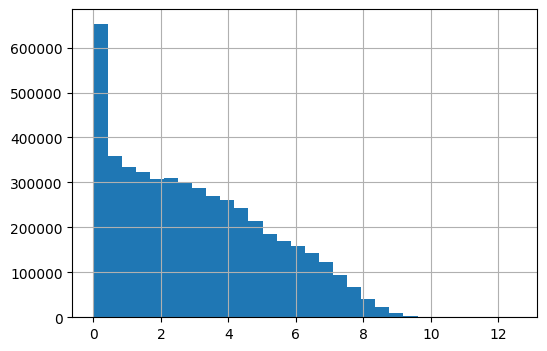

In [11]:
# Distribución de una variable numérica común
if 's' in train_input.columns:
    train_input['s'].hist(bins=30, figsize=(6,4))

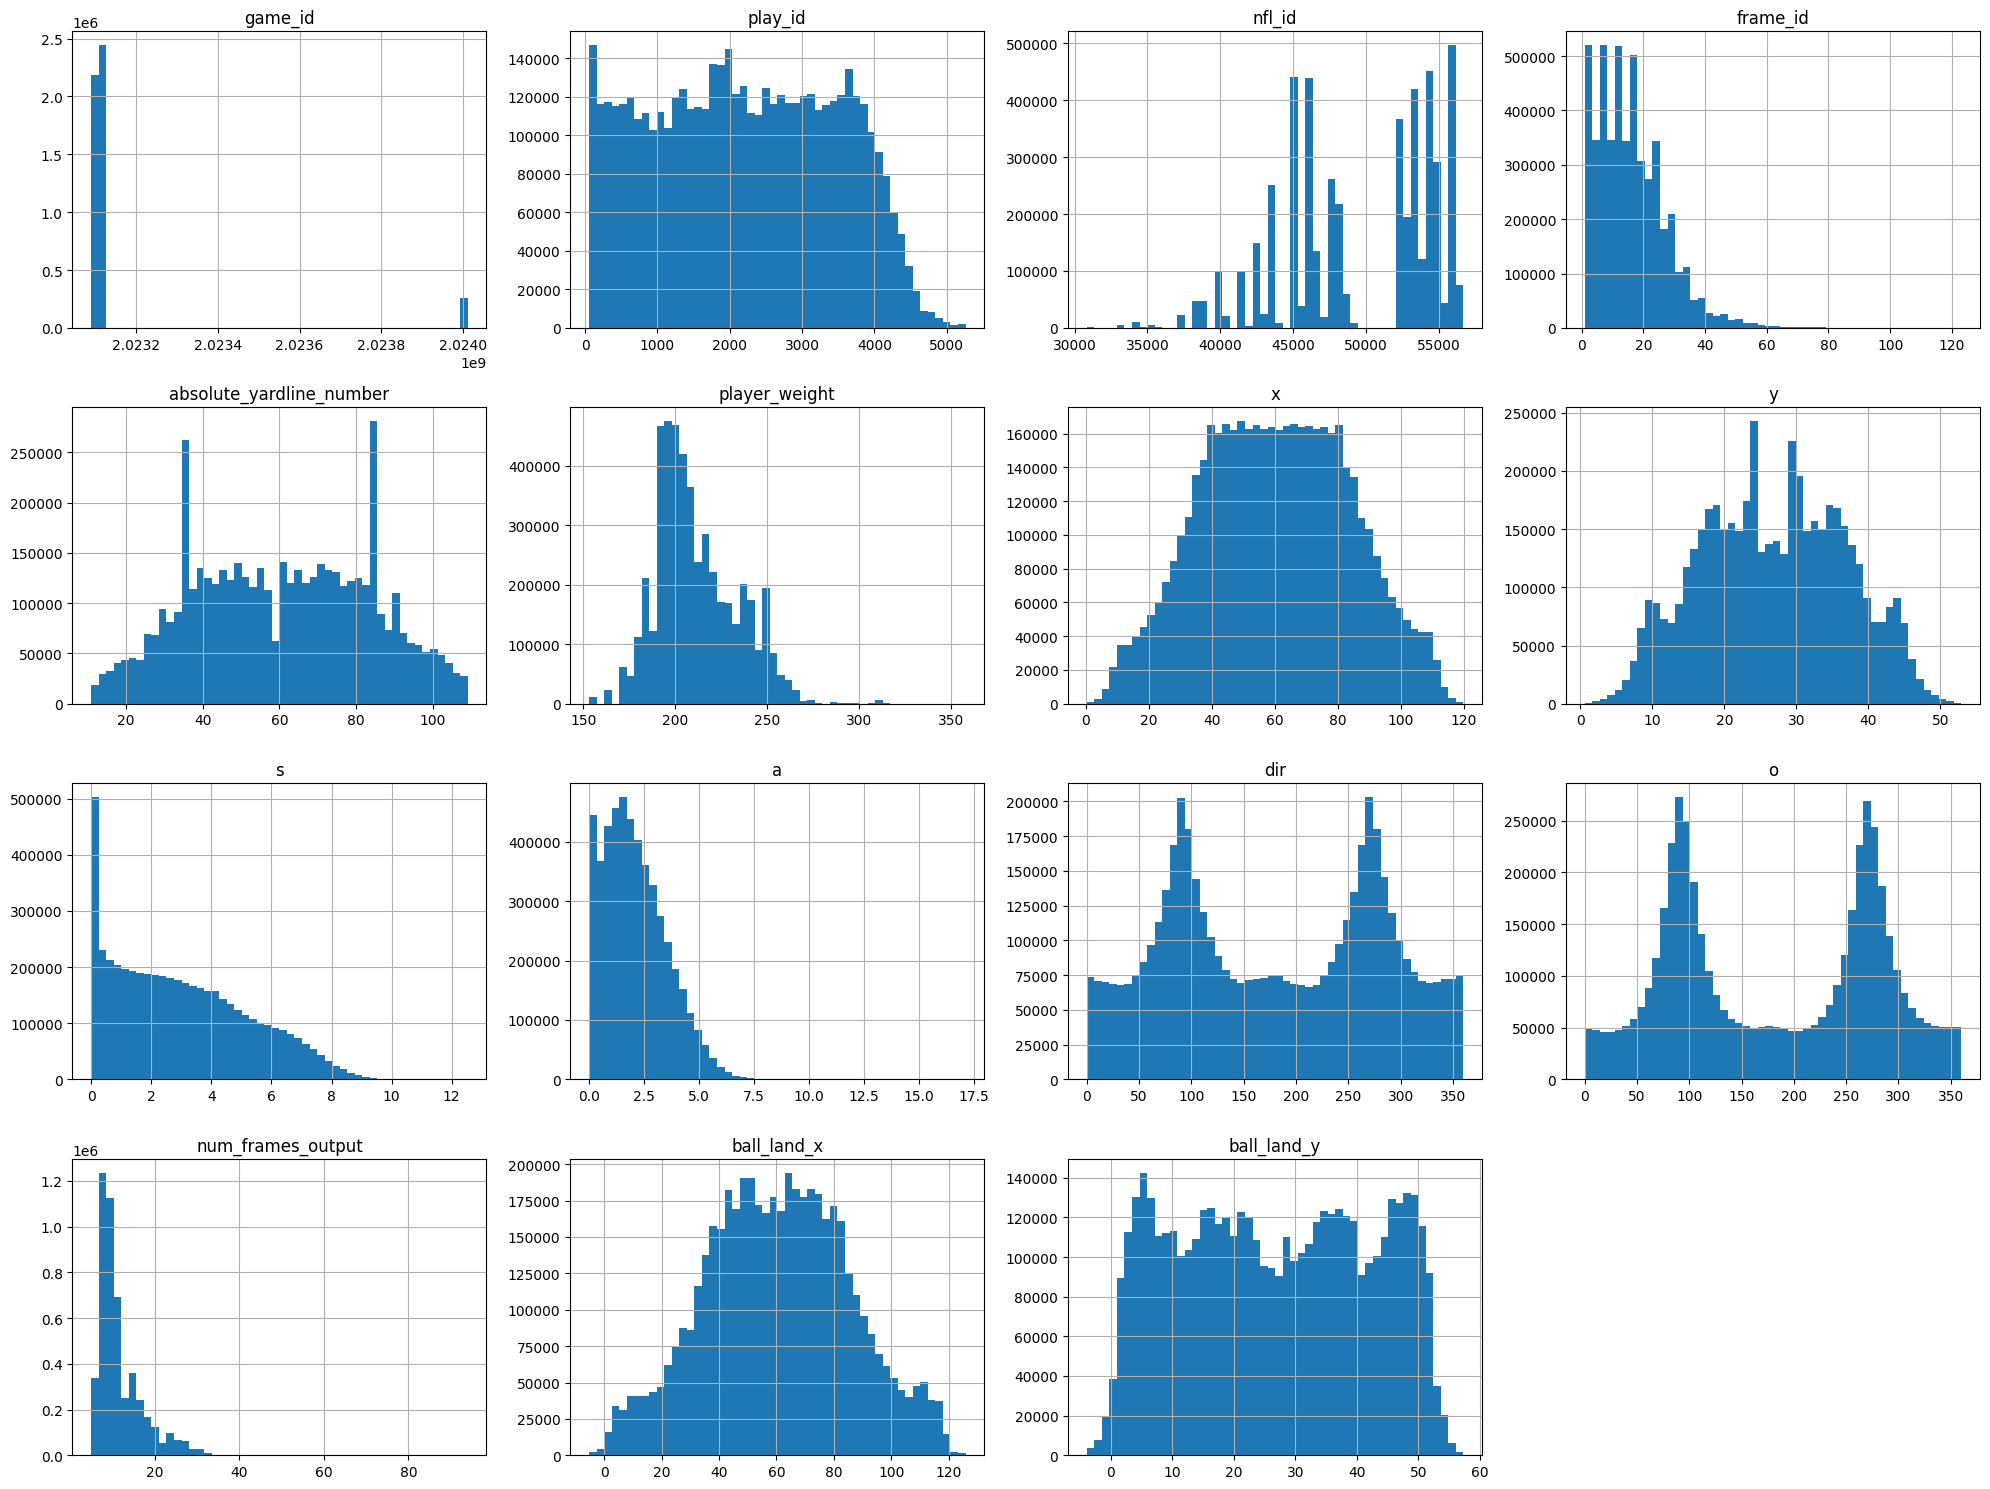

In [12]:
train_input.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

###Los archivos se combinaron correctamente y no presentan valores faltantes.
###Las variables numéricas (x, y, s, a, dir, o) muestran distribuciones coherentes con el movimiento de los jugadores.
###Las categóricas (player_role, player_side, etc.) reflejan roles y direcciones realistas.
###Los identificadores y datos personales no aportan al modelado.

###Conclusión:
###El dataset está limpio y bien estructurado; se priorizarán las variables de movimiento para el análisis y modelado.

##Columnas a eliminar

In [13]:
# --- Eliminación de columnas irrelevantes para para la predicción (posición y movimiento)---

cols_to_drop = [
    'player_name',
    'player_height', 'player_birth_date'
]

df_reduced = train_input.drop(columns=cols_to_drop)
print("Dimensiones antes:", train_input.shape)
print("Dimensiones después:", df_reduced.shape)
df_reduced.head()
df_reduced.info()

Dimensiones antes: (4880579, 23)
Dimensiones después: (4880579, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4880579 entries, 0 to 4880578
Data columns (total 20 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   game_id                   int64  
 1   play_id                   int64  
 2   player_to_predict         bool   
 3   nfl_id                    int64  
 4   frame_id                  int64  
 5   play_direction            object 
 6   absolute_yardline_number  int64  
 7   player_weight             int64  
 8   player_position           object 
 9   player_side               object 
 10  player_role               object 
 11  x                         float64
 12  y                         float64
 13  s                         float64
 14  a                         float64
 15  dir                       float64
 16  o                         float64
 17  num_frames_output         int64  
 18  ball_land_x               float64



###player_name: es un dato nominal que no tiene relación numérica con el comportamiento del jugador.
###player_height: aunque físico, su impacto en la trayectoria no se modela directamente en este contexto, y además está en formato texto.
###player_birth_date: no influye en la dinámica instantánea del juego, y su información ya se refleja indirectamente en el rendimiento.


##Interpretación general y comprensión del conjunto de datos

###El conjunto de datos del NFL Big Data Bowl 2026 reúne información espacio-temporal de los jugadores durante jugadas de pase en la NFL, capturada mediante el sistema Next Gen Stats. Cada registro describe la posición, velocidad, aceleración, orientación y rol de cada jugador antes y después del lanzamiento del balón.

###Durante el análisis exploratorio se identificó que los archivos están organizados por semanas (input_2023_wXX.csv y output_2023_wXX.csv) y se relacionan por las claves (game_id, play_id, nfl_id). No se encontraron valores faltantes, lo cual indica una buena calidad de los datos. Las variables categóricas —como posición, rol y dirección de juego— requieren codificación numérica para su uso en modelos predictivos.

###La estructura del dataset permite analizar tanto el comportamiento individual de los jugadores como las dinámicas colectivas del juego. Además, se pueden derivar características adicionales (como componentes de velocidad u orientación) para capturar mejor el movimiento y contexto del jugador. En conjunto, estos datos ofrecen una base sólida para desarrollar modelos que predigan trayectorias y comportamientos durante las jugadas de pase, cumpliendo el objetivo central del desafío.

##Preproceso

In [14]:
# ==============================================================================
# PASO 1: ESTABLECER EL DATAFRAME DE TRABAJO
# ==============================================================================
# Trabajamos directamente con tu DataFrame pre-cargado y reducido.
df = df_reduced.copy()


# ==============================================================================
# PASO 2: DEFINICIÓN DE VARIABLES DE ENTRADA (X) Y SALIDA (y)
# ==============================================================================
print("Paso 1: Definiendo características (X) y objetivos (y)...")

# La salida (target) son las coordenadas 'x' e 'y'
y = df[['x', 'y']]

# Las entradas (features) son el resto de columnas, excluyendo identificadores
# y los propios objetivos.
X = df.drop(columns=[
    'x', 'y', # Objetivos
    'game_id', 'play_id', 'nfl_id', 'frame_id', # Identificadores
    'player_to_predict', 'num_frames_output', # Metadatos
    'ball_land_x', 'ball_land_y' # Otros posibles objetivos
])


# ==============================================================================
# PASO 3: CODIFICACIÓN DE VARIABLES CATEGÓRICAS
# ==============================================================================
print("Paso 2: Codificando variables categóricas...")
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
X = pd.get_dummies(X, columns=categorical_cols, dummy_na=False, drop_first=True)


# ==============================================================================
# PASO 4: IMPUTACIÓN DE VALORES FALTANTES
# ==============================================================================
print("Paso 3: Rellenando valores faltantes con la mediana...")
# Iteramos sobre las columnas restantes para rellenar nulos
for col in X.columns:
    if X[col].isnull().any():
        # Verificamos que la columna sea numérica antes de calcular la mediana
        if pd.api.types.is_numeric_dtype(X[col]):
            median_val = X[col].median()
            X[col].fillna(median_val, inplace=True)
        else:
            # Si no es numérica (poco probable después de get_dummies), rellenamos con un valor constante
            X[col].fillna('missing', inplace=True)


# ==============================================================================
# PASO 5: DIVISIÓN DE DATOS (60% ENTRENAMIENTO, 20% VALIDACIÓN, 20% PRUEBA)
# ==============================================================================
print("Paso 4: Dividiendo los datos...")
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)
del X_temp, y_temp


# ==============================================================================
# PASO 6: NORMALIZACIÓN DE DATOS (ESCALADO ESTÁNDAR)
# ==============================================================================
print("Paso 5: Normalizando los datos...")
scaler = MinMaxScaler()

# Ajustar el escalador SÓLO con los datos de entrenamiento
scaler.fit(X_train)

# Transformar todos los conjuntos de datos
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convertir de nuevo a DataFrames de pandas para mantener la estructura
X_train = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_val = pd.DataFrame(X_val_scaled, columns=X.columns, index=X_val.index)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)


# ==============================================================================
# RESULTADO FINAL
# ==============================================================================
print("\n--- PREPROCESAMIENTO COMPLETADO ---")
print(f"Conjunto de Entrenamiento: X={X_train.shape}, y={y_train.shape}")
print(f"Conjunto de Validación:    X={X_val.shape}, y={y_val.shape}")
print(f"Conjunto de Prueba:        X={X_test.shape}, y={y_test.shape}")

Paso 1: Definiendo características (X) y objetivos (y)...
Paso 2: Codificando variables categóricas...
Paso 3: Rellenando valores faltantes con la mediana...
Paso 4: Dividiendo los datos...
Paso 5: Normalizando los datos...

--- PREPROCESAMIENTO COMPLETADO ---
Conjunto de Entrenamiento: X=(2928347, 29), y=(2928347, 2)
Conjunto de Validación:    X=(976116, 29), y=(976116, 2)
Conjunto de Prueba:        X=(976116, 29), y=(976116, 2)


In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2928347 entries, 3286085 to 1692743
Data columns (total 29 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   absolute_yardline_number        float64
 1   player_weight                   float64
 2   s                               float64
 3   a                               float64
 4   dir                             float64
 5   o                               float64
 6   play_direction_right            float64
 7   player_position_DE              float64
 8   player_position_DT              float64
 9   player_position_FB              float64
 10  player_position_FS              float64
 11  player_position_ILB             float64
 12  player_position_K               float64
 13  player_position_LB              float64
 14  player_position_MLB             float64
 15  player_position_NT              float64
 16  player_position_OLB             float64
 17  player_position_P         

In [16]:
X_train.head()

absolute_yardline_number  player_weight         s         a  \
3286085                  0.244898       0.278049  0.000000  0.000000   
272925                   0.653061       0.229268  0.140463  0.139019   
4711765                  0.489796       0.204878  0.328013  0.240070   
4825412                  0.173469       0.165854  0.064645  0.184579   
2633554                  0.306122       0.302439  0.296887  0.168808   

              dir         o  play_direction_right  player_position_DE  \
3286085  0.706361  0.245806                   1.0                 0.0   
272925   0.589194  0.713278                   1.0                 0.0   
4711765  0.509000  0.482028                   0.0                 0.0   
4825412  0.312778  0.842361                   1.0                 0.0   
2633554  0.057667  0.177278                   1.0                 0.0   

         player_position_DT  player_position_FB  ...  player_position_RB  \
3286085                 0.0                 0.0  ...                 0.0   
272925                  0.0                 0.0  ...                 0.0   
4711765                 0.0                 0.0  ...                 0.0   
4825412                 0.0                 0.0  ...                 0.0   
2633554                 0.0                 0.0  ...                 1.0   

         player_position_S  player_position_SS  player_position_T  \
3286085                0.0                 0.0                0.0   
272925                 0.0                 0.0                0.0   
4711765                0.0                 0.0                0.0   
4825412                0.0                 0.0                0.0   
2633554                0.0                 0.0                0.0   

         player_position_TE  player_position_WR  player_side_Offense  \
3286085                 0.0                 0.0                  1.0   
272925                  0.0                 0.0                  0.0   
4711765                 0.0                 1.0                  1.0   
4825412                 0.0                 0.0                  0.0   
2633554                 0.0                 0.0                  1.0   

         player_role_Other Route Runner  player_role_Passer  \
3286085                             0.0                 1.0   
272925                              0.0                 0.0   
4711765                             0.0                 0.0   
4825412                             0.0                 0.0   
2633554                             1.0                 0.0   

         player_role_Targeted Receiver  
3286085                            0.0  
272925                             0.0  
4711765                            1.0  
4825412                            0.0  
2633554                            0.0  

[5 rows x 29 columns]

In [17]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2928347 entries, 3286085 to 1692743
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   x       float64
 1   y       float64
dtypes: float64(2)
memory usage: 67.0 MB


In [18]:
y_train.head()

x      y
3286085  33.51  29.70
272925   92.22   6.26
4711765  53.77  38.45
4825412  34.93  15.22
2633554  35.64  28.48

In [19]:


# Asumimos que 'df_reduced' ya existe en tu entorno.

# --- PASO 1: Seleccionar solo las columnas numéricas ---
# El método .corr() solo funciona con números.
df_numeric = df_reduced.select_dtypes(include=np.number)

# --- PASO 2: Calcular la matriz de correlación ---
corr_matrix = df_numeric.corr()

# --- PASO 3: Aislar y ordenar las correlaciones con los objetivos 'x' e 'y' ---
# Este es el código que tú propusiste, ahora aplicado al dataframe numérico.
corr_targets = corr_matrix[['x', 'y']].sort_values(by='x', ascending=False)

# --- PASO 4: Mostrar la tabla de resultados ---
print("Correlación de las variables numéricas con 'x' e 'y':\n")
print(corr_targets)

Correlación de las variables numéricas con 'x' e 'y':

                                 x         y
x                         1.000000 -0.005442
absolute_yardline_number  0.937889 -0.004579
ball_land_x               0.859600 -0.004685
o                         0.131395  0.006594
frame_id                  0.006850  0.002267
game_id                   0.004195  0.002696
player_weight             0.003312  0.002333
a                         0.001613 -0.001657
nfl_id                    0.000225  0.000361
s                        -0.002098 -0.002318
y                        -0.005442  1.000000
play_id                  -0.008586 -0.000180
ball_land_y              -0.009878  0.050480
num_frames_output        -0.012528  0.000495
dir                      -0.066573 -0.000736


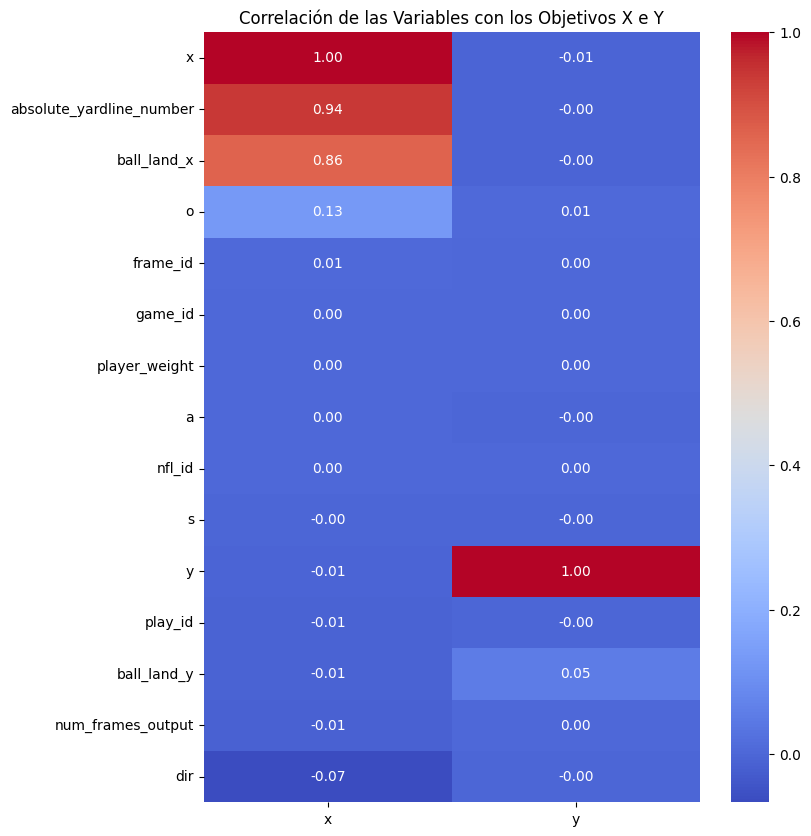

In [20]:
# --- Visualización de la tabla de correlaciones ---
plt.figure(figsize=(8, 10))
sns.heatmap(
    corr_targets, # Usamos la tabla ordenada que ya creamos
    annot=True,     # Muestra los números dentro de cada celda
    cmap='coolwarm',# Usamos un mapa de color azul (negativo) a rojo (positivo)
    fmt=".2f"       # Formatear los números a dos decimales
)
plt.title('Correlación de las Variables con los Objetivos X e Y')
plt.show()

In [21]:
# Correlación con 'x'
corr_x = abs(corr_matrix["x"]).sort_values(ascending=False)
print(" Correlación absoluta con la salida x:")
print(corr_x)

# Correlación con 'y'
corr_y = abs(corr_matrix["y"]).sort_values(ascending=False)
print("\n Correlación absoluta con la salida y:")
print(corr_y)

 Correlación absoluta con la salida x:
x                           1.000000
absolute_yardline_number    0.937889
ball_land_x                 0.859600
o                           0.131395
dir                         0.066573
num_frames_output           0.012528
ball_land_y                 0.009878
play_id                     0.008586
frame_id                    0.006850
y                           0.005442
game_id                     0.004195
player_weight               0.003312
s                           0.002098
a                           0.001613
nfl_id                      0.000225
Name: x, dtype: float64

 Correlación absoluta con la salida y:
y                           1.000000
ball_land_y                 0.050480
o                           0.006594
x                           0.005442
ball_land_x                 0.004685
absolute_yardline_number    0.004579
game_id                     0.002696
player_weight               0.002333
s                           0.002318
frame_id 

#Regresores



---

### Se define pipeline para entrenar un modelo de regresión

Para el conjunto de datos reducido (df_reduced), se define un **pipeline** de entrenamiento con un preprocesamiento basado en **normalización MinMaxScaler**, con el objetivo de llevar todas las variables a la misma escala dentro del rango [0, 1].
Este paso es esencial, ya que evita que variables con diferentes magnitudes dominen el aprendizaje del modelo, garantizando así una mejor estabilidad numérica y una convergencia más eficiente durante el entrenamiento.

---

### Validación cruzada

Se implementará una **validación cruzada de 4 folds**, lo cual implica dividir el conjunto de datos en 4 subconjuntos del mismo tamaño.
En cada iteración, 3 subconjuntos se utilizan para entrenamiento y 1 para validación, repitiendo el proceso hasta que cada subconjunto haya sido usado una vez para validar.
Esto permite obtener una evaluación más robusta y menos dependiente de una sola partición de los datos.

---

### Definición de métricas de evaluación

Las métricas utilizadas para comparar los diferentes modelos de regresión serán las siguientes:

#### - MAE (Mean Absolute Error)

Promedio de las diferencias absolutas entre los valores reales y predichos.
Es fácil de interpretar porque tiene las mismas unidades que la variable objetivo.

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
$$

---

#### - MSE (Mean Squared Error)

Promedio de los errores al cuadrado. Penaliza más fuertemente los errores grandes (outliers), por lo que es útil cuando se desea reducir desviaciones grandes.

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2
$$

---

#### - R² (Coeficiente de Determinación)

Indica el grado en que el modelo explica la variabilidad de los datos.
Un valor cercano a 1 representa un excelente ajuste del modelo, mientras que valores negativos indican un mal desempeño.

$$
R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}*i)^2}{\sum*{i=1}^n (y_i - \bar{y})^2}
$$

---

#### - MAPE (Mean Absolute Percentage Error)

Mide el error promedio en porcentaje respecto al valor real, permitiendo evaluar la magnitud relativa del error.

$$
\text{MAPE} = \frac{100%}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right|
$$


## LinearRegresor
$$
\min_{w} \; \frac{1}{2n} \| Xw - y \|_2^2
$$


###Se entrenó un modelo de Regresión Lineal estándar usando la librería cuml de RAPIDS para la aceleración por GPU. No se realizó optimización de hiperparámetros, ya que este modelo no los tiene, estableciendo así un rendimiento base (baseline) para la comparación.

In [22]:
# Asumimos que los dataframes X_train, y_train, X_test, y_test ya existen del preprocesamiento
# Si no, por favor, ejecuta el último bloque de preprocesamiento que funcionó.

import cudf
import cuml
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

print("Importando librerías de GPU y preparando datos...")

# Mover datos de pandas a cuDF para procesamiento en GPU
X_train_gpu = cudf.from_pandas(X_train)
y_train_gpu = cudf.from_pandas(y_train)
X_test_gpu = cudf.from_pandas(X_test)

# Instanciar y entrenar el modelo en la GPU
print("Entrenando el modelo de Regresión Lineal...")
lr_model = cuml.LinearRegression()
lr_model.fit(X_train_gpu, y_train_gpu)
print("Entrenamiento completado.")

# Realizar predicciones y evaluar
print("Realizando predicciones y evaluando...")
predictions_gpu = lr_model.predict(X_test_gpu)

# Mover resultados al CPU para evaluación con Scikit-learn
predictions_cpu = predictions_gpu.to_numpy()
y_test_cpu = y_test.to_numpy()

# Función para calcular métricas
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100
    return mae, mse, r2, mape

mae_x, mse_x, r2_x, mape_x = calculate_metrics(y_test_cpu[:, 0], predictions_cpu[:, 0])
mae_y, mse_y, r2_y, mape_y = calculate_metrics(y_test_cpu[:, 1], predictions_cpu[:, 1])

# Resultados promedio
avg_mae = np.mean([mae_x, mae_y])
avg_mse = np.mean([mse_x, mse_y])
avg_r2 = np.mean([r2_x, r2_y])
avg_mape = np.mean([mape_x, mape_y])

# Presentar los resultados
print("\n--- Resultados de Evaluación: Linear Regression (Baseline) ---")
print(f"  MAE (promedio):  {avg_mae:.4f}")
print(f"  MSE (promedio):  {avg_mse:.4f}")
print(f"  R²  (promedio):  {avg_r2:.4f}")
print(f"  MAPE(promedio):  {avg_mape:.2f}%")
print("---------------------------------------------------------------")

Importando librerías de GPU y preparando datos...
Entrenando el modelo de Regresión Lineal...


/usr/local/lib/python3.12/dist-packages/cuml/internals/api_decorators.py:211: UserWarning: Changing solver to 'svd' as this is the only solver that support multiple targets currently.
  ret = func(*args, **kwargs)


Entrenamiento completado.
Realizando predicciones y evaluando...

--- Resultados de Evaluación: Linear Regression (Baseline) ---
  MAE (promedio):  6.5396
  MSE (promedio):  68.5931
  R²  (promedio):  0.4665
  MAPE(promedio):  27.16%
---------------------------------------------------------------


Generando gráficos de dispersión para visualizar el rendimiento del regresor lineal...


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


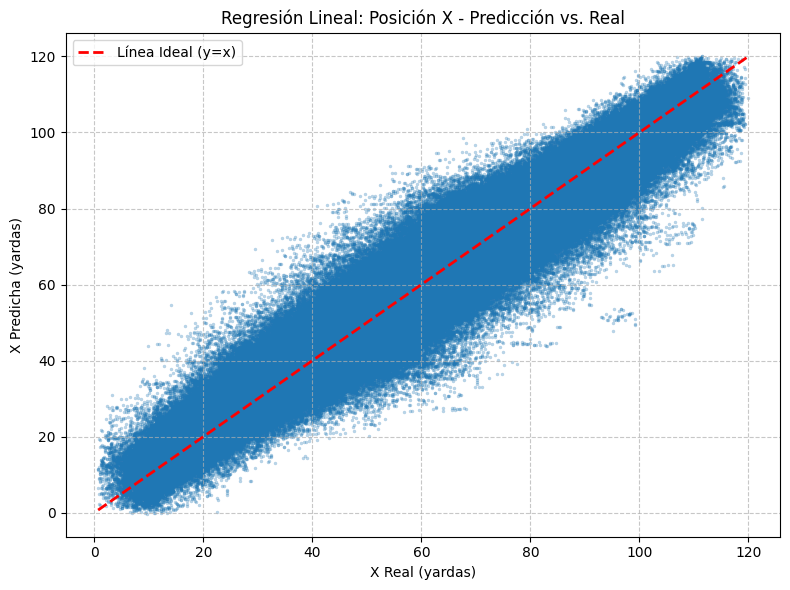

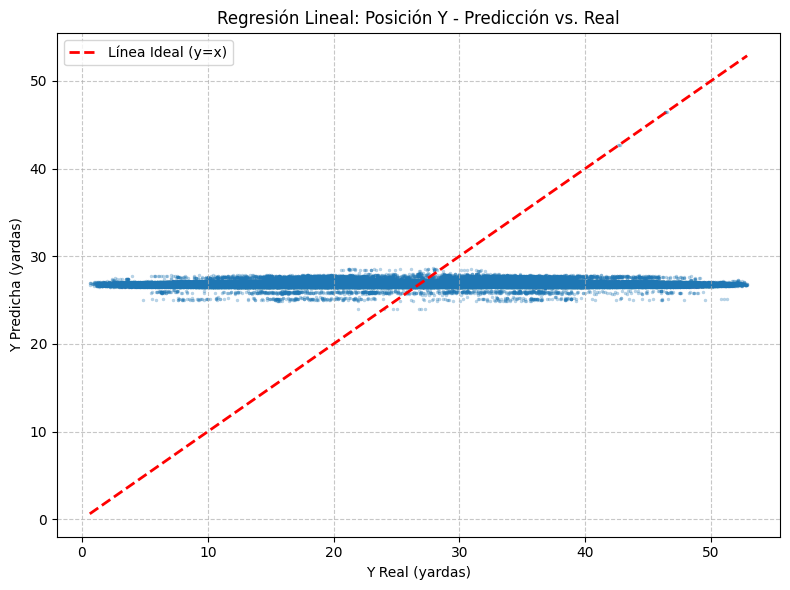

/tmp/ipython-input-36153002.py:55: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


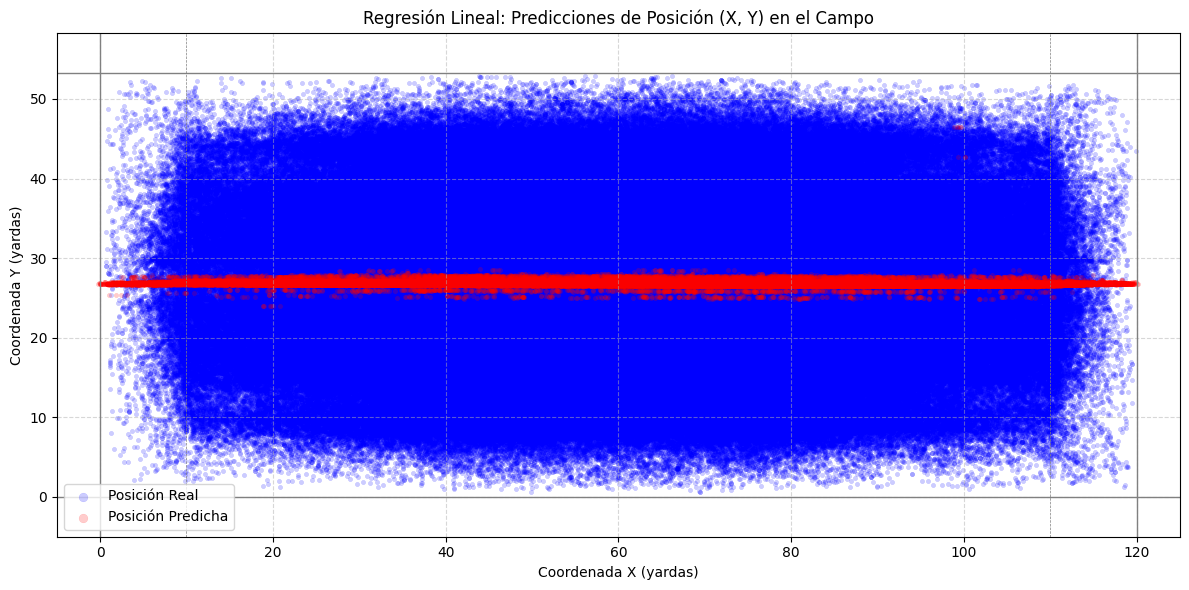

In [23]:


# Aseguramos que los datos estén en formato numpy para los gráficos
# Esto ya se hizo en el paso de evaluación, pero lo reitero por claridad.
# predictions_cpu y y_test_cpu ya son arreglos numpy con las predicciones y valores reales.

print("Generando gráficos de dispersión para visualizar el rendimiento del regresor lineal...")

# --- Gráfico 1: Predicción de X vs. Real de X ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_cpu[:, 0], y=predictions_cpu[:, 0], alpha=0.3, s=5, edgecolor=None)
plt.plot([min(y_test_cpu[:, 0]), max(y_test_cpu[:, 0])], [min(y_test_cpu[:, 0]), max(y_test_cpu[:, 0])],
         color='red', linestyle='--', linewidth=2, label='Línea Ideal (y=x)')
plt.title('Regresión Lineal: Posición X - Predicción vs. Real')
plt.xlabel('X Real (yardas)')
plt.ylabel('X Predicha (yardas)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()
print(" ")

# --- Gráfico 2: Predicción de Y vs. Real de Y ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_cpu[:, 1], y=predictions_cpu[:, 1], alpha=0.3, s=5, edgecolor=None)
plt.plot([min(y_test_cpu[:, 1]), max(y_test_cpu[:, 1])], [min(y_test_cpu[:, 1]), max(y_test_cpu[:, 1])],
         color='red', linestyle='--', linewidth=2, label='Línea Ideal (y=x)')
plt.title('Regresión Lineal: Posición Y - Predicción vs. Real')
plt.xlabel('Y Real (yardas)')
plt.ylabel('Y Predicha (yardas)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()
print(" ")

# --- Gráfico 3: Predicciones en el campo de juego (2D) ---
# Representa el campo de juego. X va de 0 a 120, Y de 0 a 53.3
plt.figure(figsize=(12, 6)) # Un tamaño más ancho para el campo
sns.scatterplot(x=y_test_cpu[:, 0], y=y_test_cpu[:, 1], color='blue', alpha=0.2, s=10, label='Posición Real', edgecolor=None)
sns.scatterplot(x=predictions_cpu[:, 0], y=predictions_cpu[:, 1], color='red', alpha=0.2, s=10, label='Posición Predicha', edgecolor=None)

# Dibujar las líneas del campo de juego para contexto (aproximado)
plt.axvline(x=0, color='gray', linestyle='-', linewidth=1)
plt.axvline(x=10, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(x=110, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(x=120, color='gray', linestyle='-', linewidth=1)
plt.axhline(y=0, color='gray', linestyle='-', linewidth=1)
plt.axhline(y=53.3, color='gray', linestyle='-', linewidth=1)
plt.xlim(-5, 125) # Extender un poco para ver los bordes
plt.ylim(-5, 58.3)
plt.title('Regresión Lineal: Predicciones de Posición (X, Y) en el Campo')
plt.xlabel('Coordenada X (yardas)')
plt.ylabel('Coordenada Y (yardas)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(markerscale=2)
plt.tight_layout()
plt.show()

### Análisis de Resultados
Los resultados son muy pobres y demuestran un subajuste (underfitting) severo.

Las métricas lo confirman, con un R² promedio de solo 0.47 (el modelo explica menos de la mitad de la varianza de los datos) y un error promedio (MAE) de 6.5 yardas, lo cual es muy alto.

Visualmente, los gráficos son la evidencia más clara:

Para la coordenada X, el modelo captura una tendencia débil y muy imprecisa.

Para la coordenada Y, el modelo falla por completo, prediciendo simplemente el valor promedio del campo (una línea horizontal).

La conclusión es que el modelo es demasiado simple para un problema con relaciones fundamentalmente no lineales.

## Lasso
$$
\min_{w} \; \frac{1}{2n} \| Xw - y \|_2^2 + \alpha \| w \|_1
$$

## Resumen del Procedimiento
Se entrenaron dos modelos de Regresión Lasso usando cuml en la GPU, uno para la coordenada x y otro para la y. Se introdujo la regularización L1, que busca simplificar el modelo y seleccionar las características más importantes. Se utilizó optimización bayesiana con Optuna para encontrar el hiperparámetro de regularización alpha óptimo para cada modelo.

In [24]:


# ==============================================================================
# PASO 1: PREPARAR DATOS EN LA GPU (SIN CAMBIOS)
# ==============================================================================
print("Paso 1: Moviendo datos a la GPU...")
X_train_gpu = cudf.from_pandas(X_train)
y_train_gpu = cudf.from_pandas(y_train)
X_val_gpu = cudf.from_pandas(X_val)
y_val_gpu = cudf.from_pandas(y_val)


# ==============================================================================
# PASO 2: OPTIMIZACIÓN PARA LA COORDENADA 'X'
# ==============================================================================
print("\nIniciando optimización para el objetivo 'x'...")

def objective_x(trial):
    alpha = trial.suggest_float('alpha', 1e-5, 10.0, log=True)
    model = cuml.Lasso(alpha=alpha)
    # Entrenar solo con la columna 'x' como objetivo
    model.fit(X_train_gpu, y_train_gpu['x'])
    preds = model.predict(X_val_gpu)
    mae = mean_absolute_error(y_val_gpu['x'].to_numpy(), preds.to_numpy())
    return mae

study_x = optuna.create_study(direction='minimize')
study_x.optimize(objective_x, n_trials=50)
best_alpha_x = study_x.best_params['alpha']

print(f"Mejor 'alpha' para 'x': {best_alpha_x:.6f} (MAE: {study_x.best_value:.4f})")


# ==============================================================================
# PASO 3: OPTIMIZACIÓN PARA LA COORDENADA 'Y'
# ==============================================================================
print("\nIniciando optimización para el objetivo 'y'...")

def objective_y(trial):
    alpha = trial.suggest_float('alpha', 1e-5, 10.0, log=True)
    model = cuml.Lasso(alpha=alpha)
    # Entrenar solo con la columna 'y' como objetivo
    model.fit(X_train_gpu, y_train_gpu['y'])
    preds = model.predict(X_val_gpu)
    mae = mean_absolute_error(y_val_gpu['y'].to_numpy(), preds.to_numpy())
    return mae

study_y = optuna.create_study(direction='minimize')
study_y.optimize(objective_y, n_trials=50)
best_alpha_y = study_y.best_params['alpha']

print(f"Mejor 'alpha' para 'y': {best_alpha_y:.6f} (MAE: {study_y.best_value:.4f})")

Paso 1: Moviendo datos a la GPU...


[I 2025-10-13 12:51:37,948] A new study created in memory with name: no-name-7d60f200-9c1f-48d2-a2da-4285228e0925



Iniciando optimización para el objetivo 'x'...


[I 2025-10-13 12:51:38,325] Trial 0 finished with value: 5.102105939770876 and parameters: {'alpha': 0.3714978295312276}. Best is trial 0 with value: 5.102105939770876.
[I 2025-10-13 12:51:38,449] Trial 1 finished with value: 5.2908488262595785 and parameters: {'alpha': 0.44378940663433203}. Best is trial 0 with value: 5.102105939770876.
[I 2025-10-13 12:51:38,537] Trial 2 finished with value: 10.460381210081858 and parameters: {'alpha': 2.348411615488593}. Best is trial 0 with value: 5.102105939770876.
[I 2025-10-13 12:51:38,690] Trial 3 finished with value: 4.6676698786235375 and parameters: {'alpha': 0.00023710048081801332}. Best is trial 3 with value: 4.6676698786235375.
[I 2025-10-13 12:51:38,842] Trial 4 finished with value: 4.667687032150055 and parameters: {'alpha': 2.1562172677408906e-05}. Best is trial 3 with value: 4.6676698786235375.
[I 2025-10-13 12:51:38,986] Trial 5 finished with value: 4.667681595942857 and parameters: {'alpha': 0.00011133848270206975}. Best is trial 3 

Mejor 'alpha' para 'x': 0.019146 (MAE: 4.6667)

Iniciando optimización para el objetivo 'y'...


[I 2025-10-13 12:51:44,418] Trial 3 finished with value: 8.409943173367887 and parameters: {'alpha': 0.008442464989792873}. Best is trial 3 with value: 8.409943173367887.
[I 2025-10-13 12:51:44,712] Trial 4 finished with value: 8.40955261011939 and parameters: {'alpha': 2.1324187363775825e-05}. Best is trial 4 with value: 8.40955261011939.
[I 2025-10-13 12:51:45,067] Trial 5 finished with value: 8.409594860648959 and parameters: {'alpha': 6.472562076549278e-05}. Best is trial 4 with value: 8.40955261011939.
[I 2025-10-13 12:51:45,488] Trial 6 finished with value: 8.409672041394955 and parameters: {'alpha': 0.00035764767515035256}. Best is trial 4 with value: 8.40955261011939.
[I 2025-10-13 12:51:45,829] Trial 7 finished with value: 8.40968459178435 and parameters: {'alpha': 0.00048030984690961725}. Best is trial 4 with value: 8.40955261011939.
[I 2025-10-13 12:51:46,128] Trial 8 finished with value: 8.409558878455266 and parameters: {'alpha': 2.7880318259498715e-05}. Best is trial 4 wi

Mejor 'alpha' para 'y': 0.000010 (MAE: 8.4095)


In [25]:
# ==============================================================================
# PASO 1: PREPARAR DATOS FINALES (COMBINADOS)
# ==============================================================================
X_train_full = pd.concat([X_train, X_val], ignore_index=True)
y_train_full = pd.concat([y_train, y_val], ignore_index=True)

X_train_full_gpu = cudf.from_pandas(X_train_full)
y_train_full_gpu = cudf.from_pandas(y_train_full)
X_test_gpu = cudf.from_pandas(X_test)


# ==============================================================================
# PASO 2: ENTRENAR LOS DOS MODELOS FINALES
# ==============================================================================
print("\nEntrenando modelo final para 'x'...")
lasso_model_x = cuml.Lasso(alpha=best_alpha_x)
lasso_model_x.fit(X_train_full_gpu, y_train_full_gpu['x'])

print("Entrenando modelo final para 'y'...")
lasso_model_y = cuml.Lasso(alpha=best_alpha_y)
lasso_model_y.fit(X_train_full_gpu, y_train_full_gpu['y'])


# ==============================================================================
# PASO 3: PREDECIR Y COMBINAR RESULTADOS
# ==============================================================================
print("\nEvaluando los modelos en el conjunto de prueba...")
# Predecir cada coordenada por separado
preds_x_gpu = lasso_model_x.predict(X_test_gpu)
preds_y_gpu = lasso_model_y.predict(X_test_gpu)

# Mover a CPU
preds_x_cpu = preds_x_gpu.to_numpy()
preds_y_cpu = preds_y_gpu.to_numpy()

# Combinar las predicciones en un solo array (n_samples, 2)
predictions_cpu = np.column_stack((preds_x_cpu, preds_y_cpu))
y_test_cpu = y_test.to_numpy()


# ==============================================================================
# PASO 4: CALCULAR MÉTRICAS Y MOSTRAR GRÁFICOS
# ==============================================================================
# (El código de métricas y gráficos de la respuesta anterior funciona sin cambios)


def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100
    return mae, mse, r2, mape

mae_x, mse_x, r2_x, mape_x = calculate_metrics(y_test_cpu[:, 0], predictions_cpu[:, 0])
mae_y, mse_y, r2_y, mape_y = calculate_metrics(y_test_cpu[:, 1], predictions_cpu[:, 1])

avg_mae = np.mean([mae_x, mae_y])
avg_mse = np.mean([mse_x, mse_y])
avg_r2 = np.mean([r2_x, r2_y])
avg_mape = np.mean([mape_x, mape_y])

print("\n--- Resultados de Evaluación: Lasso Regression (Corregido) ---")
print(f"  MAE (promedio):  {avg_mae:.4f}")
print(f"  MSE (promedio):  {avg_mse:.4f}")
print(f"  R²  (promedio):  {avg_r2:.4f}")
print(f"  MAPE(promedio):  {avg_mape:.2f}%")
print("---------------------------------------------------------------")




Entrenando modelo final para 'x'...
Entrenando modelo final para 'y'...

Evaluando los modelos en el conjunto de prueba...

--- Resultados de Evaluación: Lasso Regression (Corregido) ---
  MAE (promedio):  6.5390
  MSE (promedio):  68.6047
  R²  (promedio):  0.4665
  MAPE(promedio):  27.17%
---------------------------------------------------------------


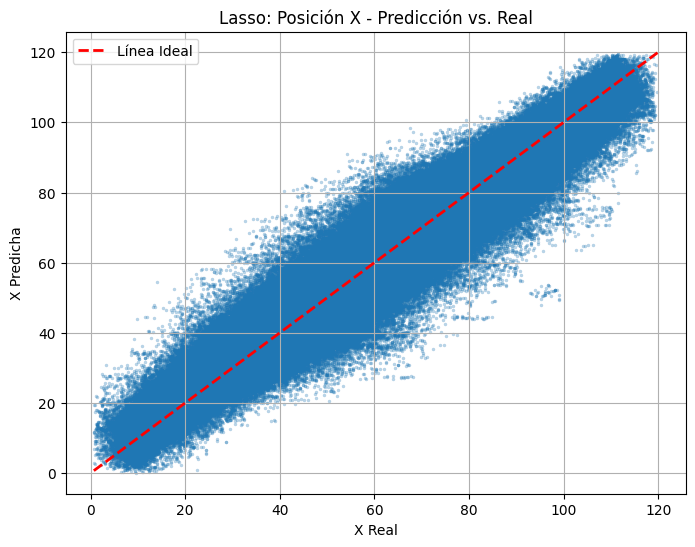

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


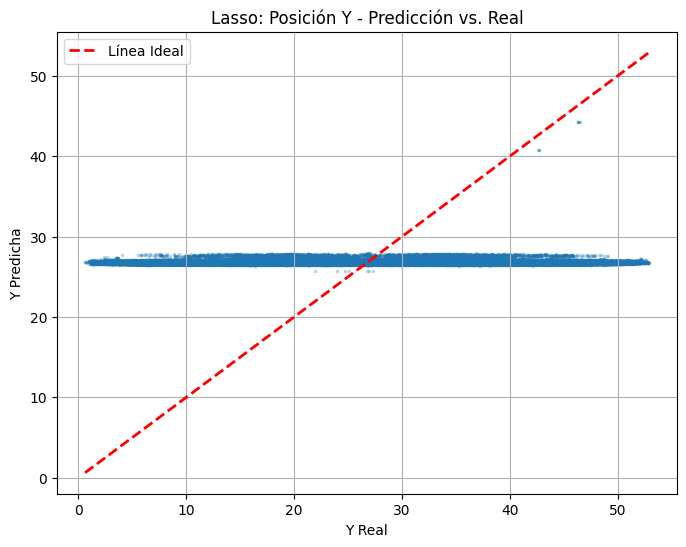

In [26]:
# Gráficos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_cpu[:, 0], y=predictions_cpu[:, 0], alpha=0.3, s=5, edgecolor=None)
plt.plot([min(y_test_cpu[:, 0]), max(y_test_cpu[:, 0])], [min(y_test_cpu[:, 0]), max(y_test_cpu[:, 0])], color='red', linestyle='--', linewidth=2, label='Línea Ideal')
plt.title('Lasso: Posición X - Predicción vs. Real'); plt.xlabel('X Real'); plt.ylabel('X Predicha'); plt.grid(True); plt.legend(); plt.show()
print(" ")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_cpu[:, 1], y=predictions_cpu[:, 1], alpha=0.3, s=5, edgecolor=None)
plt.plot([min(y_test_cpu[:, 1]), max(y_test_cpu[:, 1])], [min(y_test_cpu[:, 1]), max(y_test_cpu[:, 1])], color='red', linestyle='--', linewidth=2, label='Línea Ideal')
plt.title('Lasso: Posición Y - Predicción vs. Real'); plt.xlabel('Y Real'); plt.ylabel('Y Predicha'); plt.grid(True); plt.legend(); plt.show()

## Análisis de Resultados
El rendimiento es prácticamente idéntico al de la Regresión Lineal, lo que indica que el modelo sigue sufriendo de un subajuste severo.

Las métricas, con un R² promedio de 0.47 y un MAE de 6.5 yardas, no muestran ninguna mejora significativa. Los gráficos confirman este estancamiento: se mantiene la tendencia débil para la coordenada X y el fallo total (línea horizontal) para la coordenada Y.

La conclusión es que la regularización L1 no aportó beneficios. Esto sugiere que el problema no es la presencia de características irrelevantes, sino la incapacidad fundamental de un modelo lineal (incluso uno regularizado) para capturar la relación no lineal de los datos.

## ElasticNet
$$
\min_{w} \; \frac{1}{2n} \| Xw - y \|_2^2 + \alpha \left( \rho \| w \|_1 + \frac{1 - \rho}{2} \| w \|_2^2 \right)
$$

## Resumen del Procedimiento
Se utilizó el regresor ElasticNet, que combina la regularización L1 (de Lasso) y L2 (de Ridge) para buscar un balance entre selección de características y estabilidad. Mediante optimización bayesiana, se encontraron los mejores hiperparámetros alpha (fuerza de regularización) y l1_ratio (la mezcla de ambas penalizaciones). Se entrenaron dos modelos separados en la GPU con cuml, uno para x y otro para y.

In [27]:


# ==============================================================================
# PASO 1: PREPARAR DATOS EN LA GPU (SIN CAMBIOS)
# ==============================================================================
print("Paso 1: Moviendo datos a la GPU...")
X_train_gpu = cudf.from_pandas(X_train)
y_train_gpu = cudf.from_pandas(y_train)
X_val_gpu = cudf.from_pandas(X_val)
y_val_gpu = cudf.from_pandas(y_val)


# ==============================================================================
# PASO 2: OPTIMIZACIÓN PARA LA COORDENADA 'X'
# ==============================================================================
print("\nIniciando optimización para el objetivo 'x'...")

def objective_x(trial):
    # Sugerir valores para ambos hiperparámetros
    alpha = trial.suggest_float('alpha', 1e-5, 10.0, log=True)
    l1_ratio = trial.suggest_float('l1_ratio', 0.0, 1.0)

    model = cuml.ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    model.fit(X_train_gpu, y_train_gpu['x'])
    preds = model.predict(X_val_gpu)
    mae = mean_absolute_error(y_val_gpu['x'].to_numpy(), preds.to_numpy())
    return mae

study_x = optuna.create_study(direction='minimize')
study_x.optimize(objective_x, n_trials=50) # 50-100 pruebas es un buen número
best_params_x = study_x.best_params

print(f"Mejores parámetros para 'x': {best_params_x} (MAE: {study_x.best_value:.4f})")


# ==============================================================================
# PASO 3: OPTIMIZACIÓN PARA LA COORDENADA 'Y'
# ==============================================================================
print("\nIniciando optimización para el objetivo 'y'...")

def objective_y(trial):
    alpha = trial.suggest_float('alpha', 1e-5, 10.0, log=True)
    l1_ratio = trial.suggest_float('l1_ratio', 0.0, 1.0)

    model = cuml.ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    model.fit(X_train_gpu, y_train_gpu['y'])
    preds = model.predict(X_val_gpu)
    mae = mean_absolute_error(y_val_gpu['y'].to_numpy(), preds.to_numpy())
    return mae

study_y = optuna.create_study(direction='minimize')
study_y.optimize(objective_y, n_trials=50)
best_params_y = study_y.best_params

print(f"Mejores parámetros para 'y': {best_params_y} (MAE: {study_y.best_value:.4f})")

Paso 1: Moviendo datos a la GPU...


[I 2025-10-13 12:52:27,536] A new study created in memory with name: no-name-78823754-f966-4d07-bf46-1e2d7c23f571
[I 2025-10-13 12:52:27,662] Trial 0 finished with value: 10.355979683721507 and parameters: {'alpha': 0.11964853965155389, 'l1_ratio': 0.5931502954897029}. Best is trial 0 with value: 10.355979683721507.



Iniciando optimización para el objetivo 'x'...


[I 2025-10-13 12:52:27,786] Trial 1 finished with value: 4.700750355666568 and parameters: {'alpha': 0.015709217252197084, 'l1_ratio': 0.916483318203569}. Best is trial 1 with value: 4.700750355666568.
[I 2025-10-13 12:52:27,863] Trial 2 finished with value: 19.06146257218319 and parameters: {'alpha': 2.6737324250745345, 'l1_ratio': 0.345254751725498}. Best is trial 1 with value: 4.700750355666568.
[I 2025-10-13 12:52:28,017] Trial 3 finished with value: 4.673346869696203 and parameters: {'alpha': 0.0005456136763664548, 'l1_ratio': 0.05584802689049173}. Best is trial 3 with value: 4.673346869696203.
[I 2025-10-13 12:52:28,168] Trial 4 finished with value: 4.667698992341447 and parameters: {'alpha': 2.0848654630199526e-05, 'l1_ratio': 0.8727983990609832}. Best is trial 4 with value: 4.667698992341447.
[I 2025-10-13 12:52:28,320] Trial 5 finished with value: 4.670094917735776 and parameters: {'alpha': 0.00032200873107870233, 'l1_ratio': 0.08196998756123008}. Best is trial 4 with value: 4

Mejores parámetros para 'x': {'alpha': 0.024901013384218535, 'l1_ratio': 0.9999954426385449} (MAE: 4.6669)

Iniciando optimización para el objetivo 'y'...


[I 2025-10-13 12:52:37,160] Trial 1 finished with value: 8.40960965689522 and parameters: {'alpha': 8.95159414704846e-05, 'l1_ratio': 0.06750692624313925}. Best is trial 1 with value: 8.40960965689522.
[I 2025-10-13 12:52:37,222] Trial 2 finished with value: 8.410119201136494 and parameters: {'alpha': 0.10624260168441331, 'l1_ratio': 0.369893829556286}. Best is trial 1 with value: 8.40960965689522.
[I 2025-10-13 12:52:37,290] Trial 3 finished with value: 8.410069490189352 and parameters: {'alpha': 0.057067368470592496, 'l1_ratio': 0.24198083527092307}. Best is trial 1 with value: 8.40960965689522.
[I 2025-10-13 12:52:37,626] Trial 4 finished with value: 8.409576805079054 and parameters: {'alpha': 2.892524980968782e-05, 'l1_ratio': 0.9260245292423445}. Best is trial 4 with value: 8.409576805079054.
[I 2025-10-13 12:52:37,720] Trial 5 finished with value: 8.409878260942543 and parameters: {'alpha': 0.003913236934513527, 'l1_ratio': 0.9792218942168839}. Best is trial 4 with value: 8.40957

Mejores parámetros para 'y': {'alpha': 1.9534729002441014e-05, 'l1_ratio': 0.999109705761086} (MAE: 8.4096)


In [28]:
# ==============================================================================
# PASO 1: PREPARAR DATOS FINALES (COMBINADOS)
# ==============================================================================
X_train_full = pd.concat([X_train, X_val], ignore_index=True)
y_train_full = pd.concat([y_train, y_val], ignore_index=True)

X_train_full_gpu = cudf.from_pandas(X_train_full)
y_train_full_gpu = cudf.from_pandas(y_train_full)
X_test_gpu = cudf.from_pandas(X_test)


# ==============================================================================
# PASO 2: ENTRENAR LOS DOS MODELOS FINALES
# ==============================================================================
print("\nEntrenando modelo final para 'x' con los parámetros óptimos...")
en_model_x = cuml.ElasticNet(alpha=best_params_x['alpha'], l1_ratio=best_params_x['l1_ratio'])
en_model_x.fit(X_train_full_gpu, y_train_full_gpu['x'])

print("Entrenando modelo final para 'y' con los parámetros óptimos...")
en_model_y = cuml.ElasticNet(alpha=best_params_y['alpha'], l1_ratio=best_params_y['l1_ratio'])
en_model_y.fit(X_train_full_gpu, y_train_full_gpu['y'])


# ==============================================================================
# PASO 3: PREDECIR, COMBINAR Y EVALUAR
# ==============================================================================
print("\nEvaluando los modelos en el conjunto de prueba...")
preds_x_gpu = en_model_x.predict(X_test_gpu)
preds_y_gpu = en_model_y.predict(X_test_gpu)

predictions_cpu = np.column_stack((preds_x_gpu.to_numpy(), preds_y_gpu.to_numpy()))
y_test_cpu = y_test.to_numpy()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100
    return mae, mse, r2, mape

mae_x, mse_x, r2_x, mape_x = calculate_metrics(y_test_cpu[:, 0], predictions_cpu[:, 0])
mae_y, mse_y, r2_y, mape_y = calculate_metrics(y_test_cpu[:, 1], predictions_cpu[:, 1])

avg_mae = np.mean([mae_x, mae_y])
avg_mse = np.mean([mse_x, mse_y])
avg_r2 = np.mean([r2_x, r2_y])
avg_mape = np.mean([mape_x, mape_y])

print("\n--- Resultados de Evaluación: ElasticNet Regression ---")
print(f"  MAE (promedio):  {avg_mae:.4f}")
print(f"  MSE (promedio):  {avg_mse:.4f}")
print(f"  R²  (promedio):  {avg_r2:.4f}")
print(f"  MAPE(promedio):  {avg_mape:.2f}%")
print("------------------------------------------------------")


Entrenando modelo final para 'x' con los parámetros óptimos...
Entrenando modelo final para 'y' con los parámetros óptimos...

Evaluando los modelos en el conjunto de prueba...

--- Resultados de Evaluación: ElasticNet Regression ---
  MAE (promedio):  6.5390
  MSE (promedio):  68.6121
  R²  (promedio):  0.4664
  MAPE(promedio):  27.18%
------------------------------------------------------



Generando gráficos de dispersión para el modelo ElasticNet...


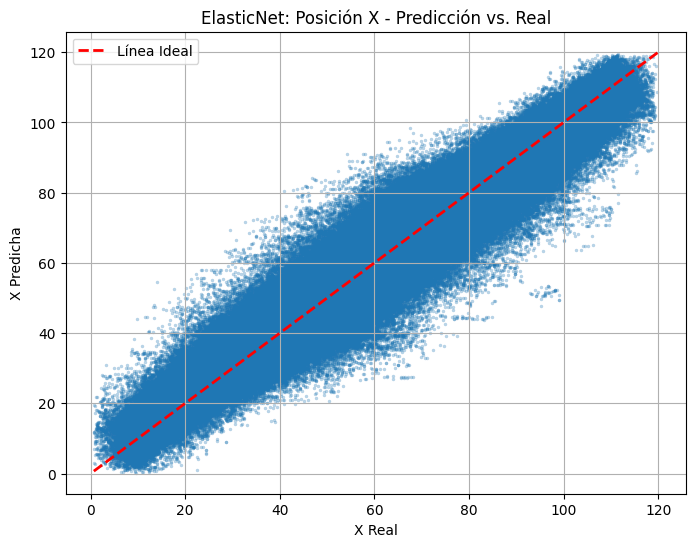

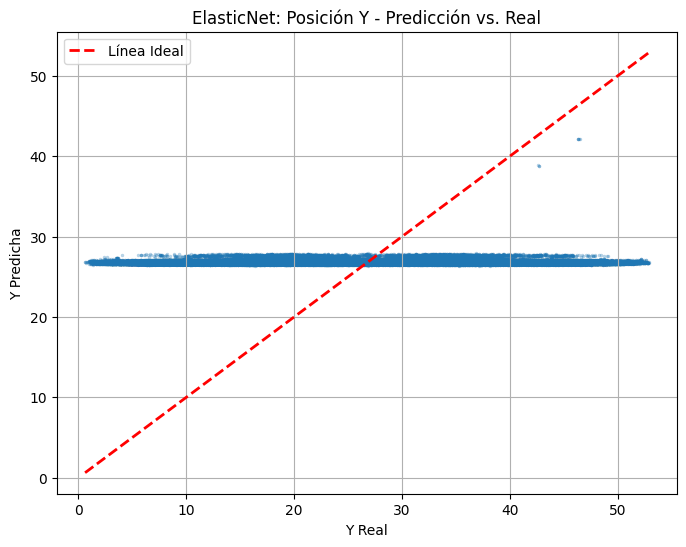

In [29]:


print("\nGenerando gráficos de dispersión para el modelo ElasticNet...")

# Gráfico de Predicción vs. Real para la Coordenada X
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_cpu[:, 0], y=predictions_cpu[:, 0], alpha=0.3, s=5, edgecolor=None)
plt.plot([y_test_cpu[:, 0].min(), y_test_cpu[:, 0].max()], [y_test_cpu[:, 0].min(), y_test_cpu[:, 0].max()], color='red', linestyle='--', linewidth=2, label='Línea Ideal')
plt.title('ElasticNet: Posición X - Predicción vs. Real')
plt.xlabel('X Real'); plt.ylabel('X Predicha'); plt.grid(True); plt.legend(); plt.show()
print(" ")

# Gráfico de Predicción vs. Real para la Coordenada Y
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_cpu[:, 1], y=predictions_cpu[:, 1], alpha=0.3, s=5, edgecolor=None)
plt.plot([y_test_cpu[:, 1].min(), y_test_cpu[:, 1].max()], [y_test_cpu[:, 1].min(), y_test_cpu[:, 1].max()], color='red', linestyle='--', linewidth=2, label='Línea Ideal')
plt.title('ElasticNet: Posición Y - Predicción vs. Real')
plt.xlabel('Y Real'); plt.ylabel('Y Predicha'); plt.grid(True); plt.legend(); plt.show()

## Análisis de Resultados
El rendimiento de ElasticNet es, una vez más, prácticamente idéntico al de la Regresión Lineal y Lasso, demostrando que el modelo sigue en un estado de subajuste (underfitting).

Las métricas, con un R² promedio de 0.47 y un MAE de 6.5 yardas, no muestran ninguna mejora. Los gráficos confirman este resultado: la predicción para la coordenada X sigue siendo una nube de puntos imprecisa, y la predicción para la coordenada Y sigue colapsada en una línea horizontal, prediciendo solo el valor promedio.

La conclusión es que ni la regularización L1, ni la L2, ni su combinación, son suficientes para mejorar el rendimiento. Esto refuerza de manera contundente que el problema reside en la naturaleza no lineal de los datos, la cual los modelos lineales no pueden capturar.

## KernelRidge
$$
\min_{\alpha} \; \| K \alpha - y \|_2^2 + \alpha \| \alpha \|_2^2;  
$$

$$
K = \text{kernel}(X, X)
$$

## Resumen del Procedimiento
Se entrenó un modelo Kernel Ridge, nuestra primera aproximación no lineal. Se utilizó el "truco del kernel" (probablemente 'rbf', según la optimización) para capturar patrones complejos. Debido a su alto costo computacional, todo el proceso (optimización bayesiana de alpha y gamma, y la evaluación) se realizó sobre una muestra reducida y fija de 15,000 filas.

In [37]:
# ==============================================================================
# PASO 1: CREAR UNA MUESTRA PEQUEÑA Y FIJA
# ==============================================================================
# Asumimos que X_full_dataset y y_full_dataset existen de la celda anterior
sample_size = 15000 # Reducimos el tamaño de la muestra
print(f"Paso 1: Creando una muestra de {sample_size} filas...")
X_sample = X_train_full.sample(n=sample_size, random_state=42)
y_sample = y_train_full.loc[X_sample.index]


# ==============================================================================
# PASO 2: DIVIDIR LA MUESTRA
# ==============================================================================
print("Paso 2: Dividiendo la muestra en conjuntos 60/20/20...")
X_train_s, X_temp_s, y_train_s, y_temp_s = train_test_split(X_sample, y_sample, test_size=0.4, random_state=42)
X_val_s, X_test_s, y_val_s, y_test_s = train_test_split(X_temp_s, y_temp_s, test_size=0.5, random_state=42)


# ==============================================================================
# PASO 3: OPTIMIZACIÓN RÁPIDA
# ==============================================================================
print("Paso 3: Ejecutando optimización en la muestra pequeña...")
# Mover los datos de la muestra a la GPU
X_train_gpu = cudf.from_pandas(X_train_s)
y_train_gpu = cudf.from_pandas(y_train_s)
X_val_gpu = cudf.from_pandas(X_val_s)
y_val_gpu = cudf.from_pandas(y_val_s)

def objective(trial):
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])
    alpha = trial.suggest_float('alpha', 1e-3, 100.0, log=True)
    params = {'kernel': kernel, 'alpha': alpha}
    if kernel == 'rbf':
        params['gamma'] = trial.suggest_float('gamma', 1e-3, 100.0, log=True)
    model = cuml.KernelRidge(**params)
    model.fit(X_train_gpu, y_train_gpu) # Entrenar con el set de entrenamiento pequeño
    preds = model.predict(X_val_gpu)    # Validar con el set de validación pequeño
    return mean_absolute_error(y_val_gpu.to_numpy(), preds.to_numpy())

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20) # Reducimos a 20 pruebas para velocidad
best_params = study.best_params
print(f"Mejores parámetros encontrados: {best_params}")


# ==============================================================================
# PASO 4: ENTRENAMIENTO FINAL Y EVALUACIÓN (SIN COMBINAR)
# ==============================================================================
print("\nPaso 4: Entrenando y evaluando el modelo final...")

# ¡CAMBIO CLAVE! Entrenamos el modelo final ÚNICAMENTE con el set de entrenamiento de la muestra.
# NO se combinan los sets de train y val.
kr_model = cuml.KernelRidge(**best_params)
kr_model.fit(X_train_gpu, y_train_gpu)

# Evaluar sobre el conjunto de prueba de la muestra
X_test_gpu = cudf.from_pandas(X_test_s)
y_test_cpu = y_test_s.to_numpy()

predictions_gpu = kr_model.predict(X_test_gpu)
predictions_cpu = predictions_gpu.to_numpy()

# Calcular métricas
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100
    return mae, mse, r2, mape

mae_x, mse_x, r2_x, mape_x = calculate_metrics(y_test_cpu[:, 0], predictions_cpu[:, 0])
mae_y, mse_y, r2_y, mape_y = calculate_metrics(y_test_cpu[:, 1], predictions_cpu[:, 1])
avg_mae = np.mean([mae_x, mae_y]); avg_mse = np.mean([mse_x, mse_y]); avg_r2 = np.mean([r2_x, r2_y]); avg_mape = np.mean([mape_x, mape_y])

print("\n--- Resultados de Evaluación: Kernel Ridge (Muestra Pequeña) ---")
print(f"  MAE (promedio):   {avg_mae:.4f}")
print(f"  MSE (promedio):   {avg_mse:.4f}")
print(f"  R²  (promedio):   {avg_r2:.4f}")
print(f"  MAPE (promedio):  {avg_mape:.2f}%")
print("---------------------------------------------------------------")

Paso 1: Creando una muestra de 15000 filas...
Paso 2: Dividiendo la muestra en conjuntos 60/20/20...
Paso 3: Ejecutando optimización en la muestra pequeña...


[I 2025-10-13 13:16:50,882] A new study created in memory with name: no-name-60cacbda-8c01-4dfd-b072-25f47ecfca7b
[I 2025-10-13 13:16:52,285] Trial 0 finished with value: 5.990705268211331 and parameters: {'kernel': 'rbf', 'alpha': 0.003321857229330945, 'gamma': 0.0011886598027183823}. Best is trial 0 with value: 5.990705268211331.
[I 2025-10-13 13:16:53,594] Trial 1 finished with value: 9.069819700371578 and parameters: {'kernel': 'rbf', 'alpha': 18.001574075340603, 'gamma': 2.188584307960913}. Best is trial 0 with value: 5.990705268211331.
[I 2025-10-13 13:16:54,905] Trial 2 finished with value: 5.254279337703809 and parameters: {'kernel': 'rbf', 'alpha': 0.1614416328833036, 'gamma': 0.06835973914387312}. Best is trial 2 with value: 5.254279337703809.
[I 2025-10-13 13:16:56,095] Trial 3 finished with value: 6.806149871860917 and parameters: {'kernel': 'linear', 'alpha': 2.2303712811815872}. Best is trial 2 with value: 5.254279337703809.
[I 2025-10-13 13:16:57,419] Trial 4 finished wi

Mejores parámetros encontrados: {'kernel': 'rbf', 'alpha': 0.02406500751102776, 'gamma': 0.7910957826232983}

Paso 4: Entrenando y evaluando el modelo final...

--- Resultados de Evaluación: Kernel Ridge (Muestra Pequeña) ---
  MAE (promedio):   4.9679
  MSE (promedio):   49.9987
  R²  (promedio):   0.5563
  MAPE (promedio):  22.31%
---------------------------------------------------------------



Generando los gráficos de dispersión para el modelo Kernel Ridge...


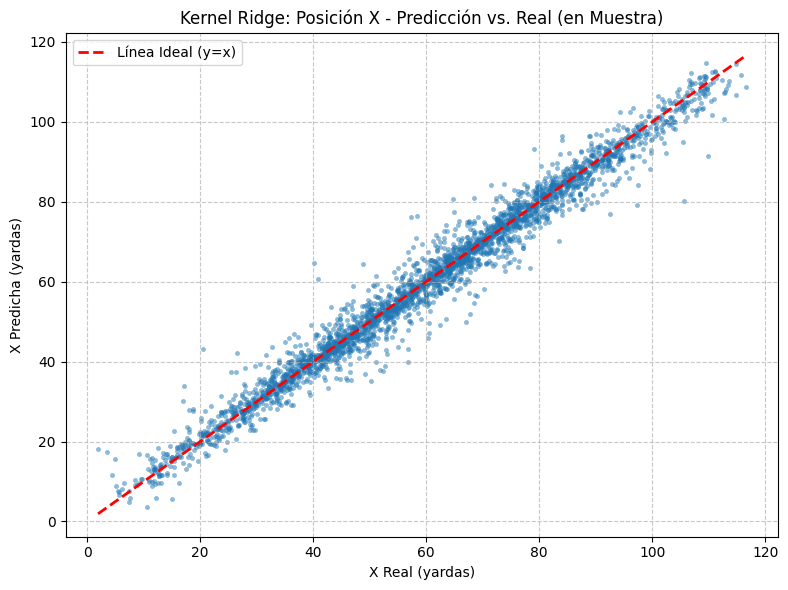

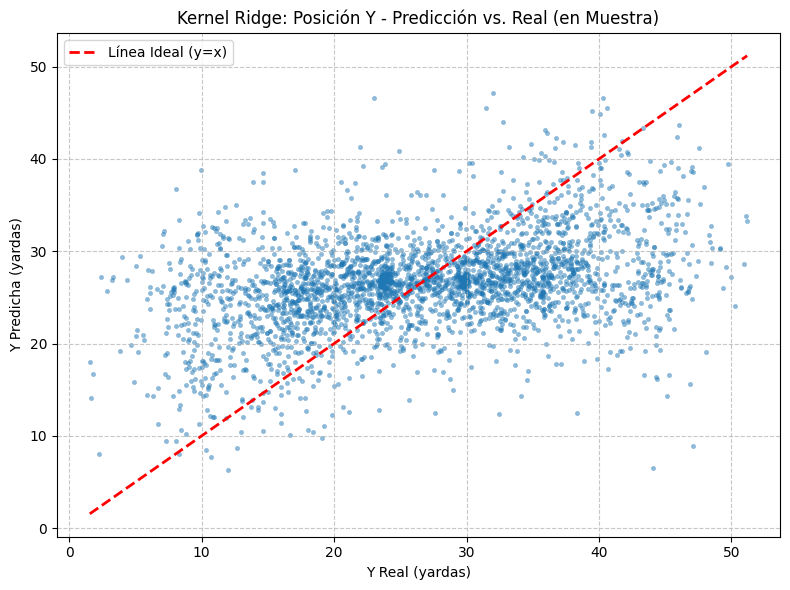

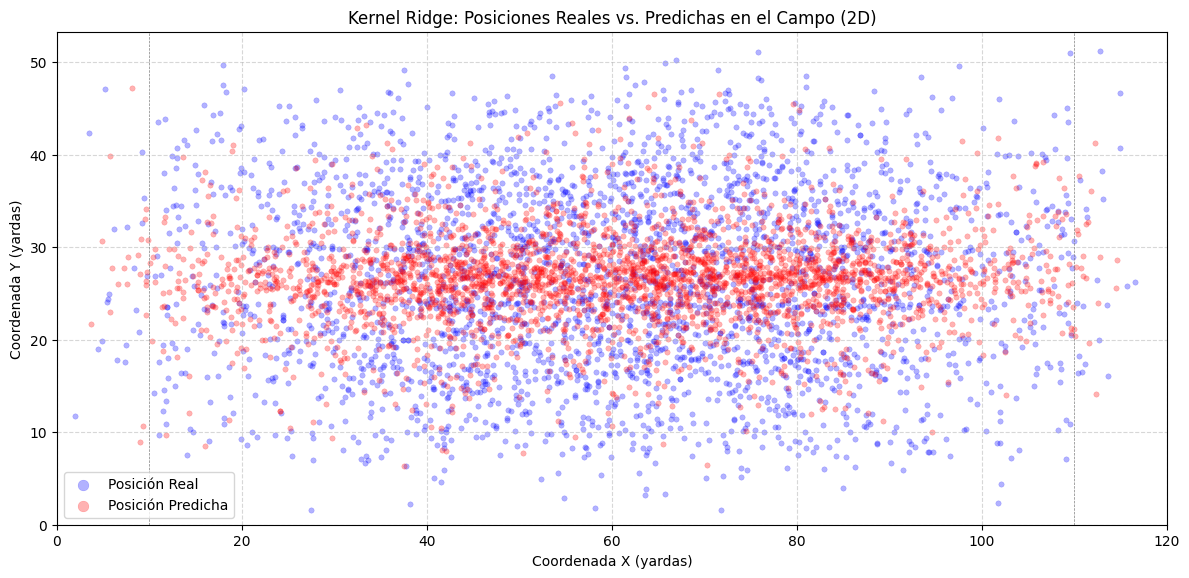

In [38]:
print("\nGenerando los gráficos de dispersión para el modelo Kernel Ridge...")

# ==============================================================================
# Gráfico 1: Predicción de X vs. Real de X
# ==============================================================================
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_cpu[:, 0], y=predictions_cpu[:, 0], alpha=0.5, s=10, edgecolor=None)
plt.plot([y_test_cpu[:, 0].min(), y_test_cpu[:, 0].max()], [y_test_cpu[:, 0].min(), y_test_cpu[:, 0].max()],
         color='red', linestyle='--', linewidth=2, label='Línea Ideal (y=x)')
plt.title('Kernel Ridge: Posición X - Predicción vs. Real (en Muestra)')
plt.xlabel('X Real (yardas)')
plt.ylabel('X Predicha (yardas)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()
print(" ")

# ==============================================================================
# Gráfico 2: Predicción de Y vs. Real de Y
# ==============================================================================
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_cpu[:, 1], y=predictions_cpu[:, 1], alpha=0.5, s=10, edgecolor=None)
plt.plot([y_test_cpu[:, 1].min(), y_test_cpu[:, 1].max()], [y_test_cpu[:, 1].min(), y_test_cpu[:, 1].max()],
         color='red', linestyle='--', linewidth=2, label='Línea Ideal (y=x)')
plt.title('Kernel Ridge: Posición Y - Predicción vs. Real (en Muestra)')
plt.xlabel('Y Real (yardas)')
plt.ylabel('Y Predicha (yardas)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()
print(" ")

# ==============================================================================
# Gráfico 3: Visualización 2D en el Campo de Juego
# ==============================================================================
plt.figure(figsize=(12, 6))
# Dibuja las posiciones reales en azul
sns.scatterplot(x=y_test_cpu[:, 0], y=y_test_cpu[:, 1], color='blue', alpha=0.3, s=15, label='Posición Real', edgecolor=None)
# Dibuja las posiciones predichas en rojo
sns.scatterplot(x=predictions_cpu[:, 0], y=predictions_cpu[:, 1], color='red', alpha=0.3, s=15, label='Posición Predicha', edgecolor=None)

# Líneas del campo para dar contexto
plt.axvline(x=10, color='gray', linestyle='--', linewidth=0.5) # End zone
plt.axvline(x=110, color='gray', linestyle='--', linewidth=0.5) # End zone
plt.xlim(0, 120)
plt.ylim(0, 53.3)
plt.title('Kernel Ridge: Posiciones Reales vs. Predichas en el Campo (2D)')
plt.xlabel('Coordenada X (yardas)')
plt.ylabel('Coordenada Y (yardas)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(markerscale=2)
plt.gca().set_aspect('equal', adjustable='box') # Asegura que el campo no se vea deformado
plt.tight_layout()
plt.show()


## Análisis de Resultados
Este modelo representa un salto cualitativo y la primera mejora significativa sobre los modelos lineales.

Las métricas muestran un claro progreso: el R² promedio subió a 0.56 (frente al 0.47 anterior), y el error promedio (MAE) bajó de 6.5 a 4.9 yardas. Esto confirma que el modelo tiene una mayor capacidad predictiva.

El verdadero avance se ve en los gráficos:

Las predicciones para la coordenada X son mucho más precisas, con los puntos agrupados más cerca de la línea ideal.

Lo más importante: en la coordenada Y, el modelo rompió la línea horizontal. Ahora es capaz de predecir un rango de valores a lo largo del campo, demostrando que ha aprendido un patrón no lineal que los modelos anteriores ignoraron por completo.

La conclusión es que el enfoque no lineal es el correcto. Aunque el rendimiento aún no es perfecto, Kernel Ridge ha demostrado ser una herramienta mucho más adecuada para este problema.

## SGDRegressor
$$
\min_{w} \; \frac{1}{n} \sum_{i=1}^n \ell(y_i, x_i^T w) + \alpha R(w)
$$

$\ell $ : función de pérdida (squared_loss, huber, etc.)  
$R(w) $ : regularización (l2, l1, elasticnet)


## Resumen del Procedimiento
Se utilizó el SGDRegressor de Scikit-learn, un modelo lineal que se entrena mediante Descenso de Gradiente Estocástico. Debido a problemas de compatibilidad con la librería de GPU, este modelo se ejecutó en CPU. Se realizó una optimización bayesiana para encontrar los mejores hiperparámetros de aprendizaje (alpha, penalty, etc.). Todo el proceso se ejecutó sobre la muestra reducida de 15,000 filas.

In [45]:
# PASO 1: USAR LA MUESTRA PEQUEÑA Y FIJA
# ==============================================================================
# Asumimos que X_train_s, y_train_s, X_val_s, y_val_s, etc., ya existen como DataFrames de PANDAS.
print(f"Paso 1: Utilizando la muestra de datos en CPU. Tamaño de entrenamiento: {X_train_s.shape}")


# ==============================================================================
# PASO 2: OPTIMIZACIÓN BAYESIANA CON SKLEARN
# ==============================================================================
def create_objective(target_col):
    def objective(trial):
        params = {
            'penalty': trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet']),
            'alpha': trial.suggest_float('alpha', 1e-5, 1.0, log=True),
            'learning_rate': trial.suggest_categorical('learning_rate', ['optimal', 'adaptive', 'invscaling']),
            'eta0': trial.suggest_float('eta0', 1e-4, 1.0, log=True)
        }
        if params['penalty'] == 'elasticnet':
            params['l1_ratio'] = trial.suggest_float('l1_ratio', 0.0, 1.0)

        # Usamos la versión de Scikit-learn
        model = SGDRegressor(loss='squared_error', **params, random_state=42)

        # Los datos permanecen como pandas/numpy
        model.fit(X_train_s, y_train_s[target_col])
        preds = model.predict(X_val_s)
        return mean_absolute_error(y_val_s[target_col], preds)
    return objective

# Optimización para 'x'
print("\nIniciando optimización para 'x' con Scikit-learn...")
study_x = optuna.create_study(direction='minimize')
study_x.optimize(create_objective('x'), n_trials=30)
best_params_x = study_x.best_params
print(f"Mejores parámetros para 'x': {best_params_x}")

# Optimización para 'y'
print("\nIniciando optimización para 'y' con Scikit-learn...")
study_y = optuna.create_study(direction='minimize')
study_y.optimize(create_objective('y'), n_trials=30)
best_params_y = study_y.best_params
print(f"Mejores parámetros para 'y': {best_params_y}")


# ==============================================================================
# PASO 3: ENTRENAMIENTO FINAL, EVALUACIÓN Y GRÁFICOS
# ==============================================================================
print("\nPaso 3: Entrenando y evaluando los modelos finales...")

# Entrenar modelo para 'x'
sgd_model_x = SGDRegressor(loss='squared_error', **best_params_x, random_state=42)
sgd_model_x.fit(X_train_s, y_train_s['x'])

# Entrenar modelo para 'y'
sgd_model_y = SGDRegressor(loss='squared_error', **best_params_y, random_state=42)
sgd_model_y.fit(X_train_s, y_train_s['y'])

# Evaluar sobre el conjunto de prueba de la muestra
y_test_cpu = y_test_s.to_numpy()

# Predecir y combinar
preds_x = sgd_model_x.predict(X_test_s)
preds_y = sgd_model_y.predict(X_test_s)
predictions_cpu = np.column_stack((preds_x, preds_y))

# Calcular métricas y mostrar gráficos
# (Se asume que la función calculate_metrics ya está definida)
mae_x, mse_x, r2_x, mape_x = calculate_metrics(y_test_cpu[:, 0], predictions_cpu[:, 0])
mae_y, mse_y, r2_y, mape_y = calculate_metrics(y_test_cpu[:, 1], predictions_cpu[:, 1])
avg_mae = np.mean([mae_x, mae_y]); avg_mse = np.mean([mse_x, mse_y]); avg_r2 = np.mean([r2_x, r2_y]); avg_mape = np.mean([mape_x, mape_y])

print("\n--- Resultados de Evaluación: SGD Regressor (Scikit-learn) ---")
print(f"  MAE (promedio):   {avg_mae:.4f}")
print(f"  MSE (promedio):   {avg_mse:.4f}")
print(f"  R²  (promedio):   {avg_r2:.4f}")
print(f"  MAPE (promedio):  {avg_mape:.2f}%")
print("---------------------------------------------------------------")

[I 2025-10-13 13:39:58,573] A new study created in memory with name: no-name-f6823efb-57fc-4533-be9e-faab52bfc9dc


Paso 1: Utilizando la muestra de datos en CPU. Tamaño de entrenamiento: (9000, 29)

Iniciando optimización para 'x' con Scikit-learn...


[I 2025-10-13 13:39:58,838] Trial 0 finished with value: 13.905031506922887 and parameters: {'penalty': 'l2', 'alpha': 0.11912683199211817, 'learning_rate': 'optimal', 'eta0': 0.5934987498836058}. Best is trial 0 with value: 13.905031506922887.
[I 2025-10-13 13:39:59,223] Trial 1 finished with value: 4.561175018001315 and parameters: {'penalty': 'l1', 'alpha': 0.039794025155817314, 'learning_rate': 'adaptive', 'eta0': 0.8678817958216389}. Best is trial 1 with value: 4.561175018001315.
[I 2025-10-13 13:39:59,458] Trial 2 finished with value: 17.490769556961517 and parameters: {'penalty': 'elasticnet', 'alpha': 0.8194437983402434, 'learning_rate': 'adaptive', 'eta0': 0.05256774563626412, 'l1_ratio': 0.518706115910937}. Best is trial 1 with value: 4.561175018001315.
[I 2025-10-13 13:39:59,479] Trial 3 finished with value: 18.48092673944313 and parameters: {'penalty': 'l2', 'alpha': 0.9145527890965477, 'learning_rate': 'optimal', 'eta0': 0.0006710404382028749}. Best is trial 1 with value: 

Mejores parámetros para 'x': {'penalty': 'l1', 'alpha': 0.010149883386568422, 'learning_rate': 'adaptive', 'eta0': 0.00735531535207113}

Iniciando optimización para 'y' con Scikit-learn...


[I 2025-10-13 13:40:10,409] Trial 1 finished with value: 8.267736069023298 and parameters: {'penalty': 'l1', 'alpha': 0.023762069892758163, 'learning_rate': 'adaptive', 'eta0': 0.46669113683173385}. Best is trial 1 with value: 8.267736069023298.
[I 2025-10-13 13:40:10,569] Trial 2 finished with value: 8.265892546174475 and parameters: {'penalty': 'elasticnet', 'alpha': 0.013594513560719775, 'learning_rate': 'adaptive', 'eta0': 0.6922737311847175, 'l1_ratio': 0.14586984567587535}. Best is trial 2 with value: 8.265892546174475.
[I 2025-10-13 13:40:10,717] Trial 3 finished with value: 8.26819219270229 and parameters: {'penalty': 'l1', 'alpha': 0.06294045849643859, 'learning_rate': 'adaptive', 'eta0': 0.043465504909229576}. Best is trial 2 with value: 8.265892546174475.
[I 2025-10-13 13:40:10,865] Trial 4 finished with value: 8.264215690259366 and parameters: {'penalty': 'l1', 'alpha': 0.0020120674785213508, 'learning_rate': 'adaptive', 'eta0': 0.011190582793874332}. Best is trial 4 with v

Mejores parámetros para 'y': {'penalty': 'l2', 'alpha': 0.00013406887466457497, 'learning_rate': 'adaptive', 'eta0': 0.029557874955416726}

Paso 3: Entrenando y evaluando los modelos finales...

--- Resultados de Evaluación: SGD Regressor (Scikit-learn) ---
  MAE (promedio):   6.5077
  MSE (promedio):   68.0873
  R²  (promedio):   0.4656
  MAPE (promedio):  27.95%
---------------------------------------------------------------


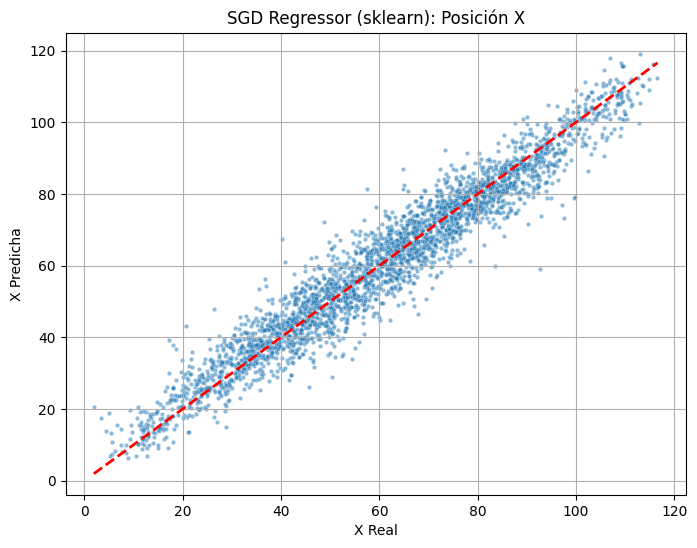

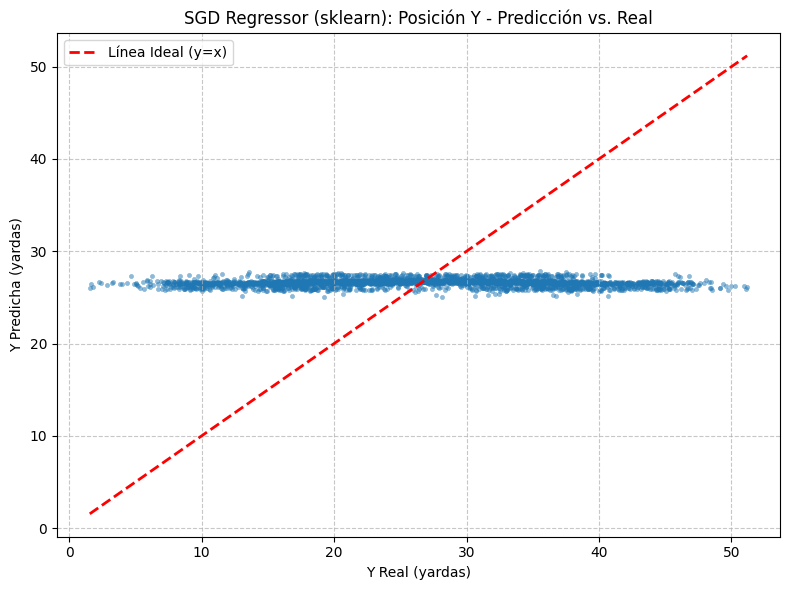

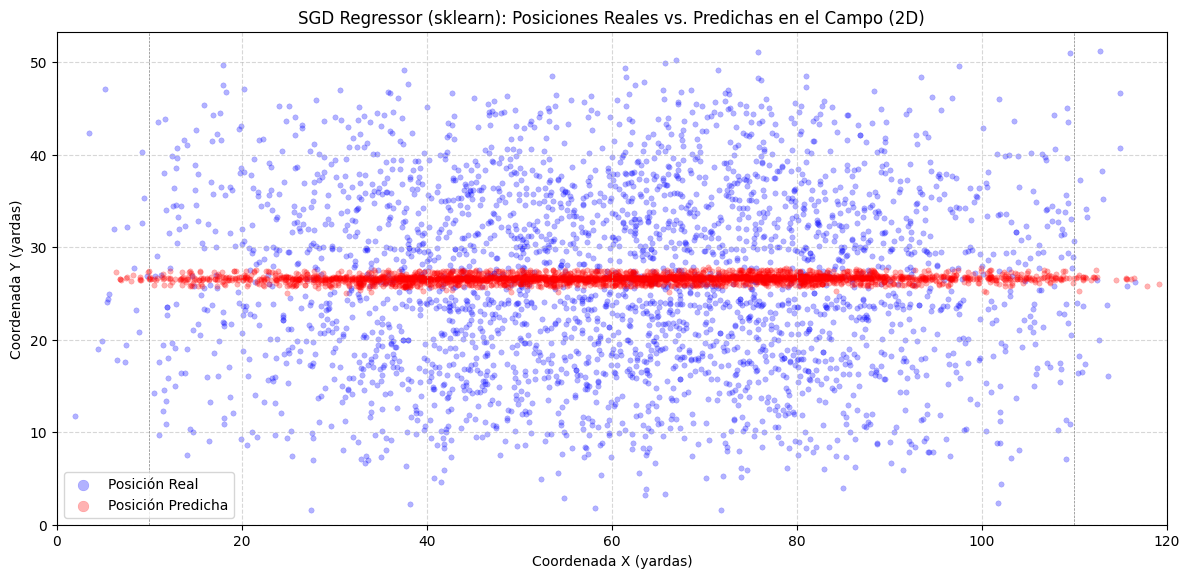

In [46]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_cpu[:, 0], y=predictions_cpu[:, 0], alpha=0.5, s=10)
plt.plot([y_test_cpu[:, 0].min(), y_test_cpu[:, 0].max()], [y_test_cpu[:, 0].min(), y_test_cpu[:, 0].max()], 'r--', lw=2)
plt.title('SGD Regressor (sklearn): Posición X'); plt.xlabel('X Real'); plt.ylabel('X Predicha'); plt.grid(True); plt.show()
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_cpu[:, 1], y=predictions_cpu[:, 1], alpha=0.5, s=10, edgecolor=None)
plt.plot([y_test_cpu[:, 1].min(), y_test_cpu[:, 1].max()], [y_test_cpu[:, 1].min(), y_test_cpu[:, 1].max()],
         color='red', linestyle='--', linewidth=2, label='Línea Ideal (y=x)')
plt.title('SGD Regressor (sklearn): Posición Y - Predicción vs. Real')
plt.xlabel('Y Real (yardas)')
plt.ylabel('Y Predicha (yardas)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()
print(" ")

# ==============================================================================
# Gráfico 3: Visualización 2D en el Campo de Juego
# ==============================================================================
plt.figure(figsize=(12, 6))
# Dibuja las posiciones reales en azul
sns.scatterplot(x=y_test_cpu[:, 0], y=y_test_cpu[:, 1], color='blue', alpha=0.3, s=15, label='Posición Real', edgecolor=None)
# Dibuja las posiciones predichas en rojo
sns.scatterplot(x=predictions_cpu[:, 0], y=predictions_cpu[:, 1], color='red', alpha=0.3, s=15, label='Posición Predicha', edgecolor=None)

# Líneas del campo para dar contexto
plt.axvline(x=10, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(x=110, color='gray', linestyle='--', linewidth=0.5)
plt.xlim(0, 120)
plt.ylim(0, 53.3)
plt.title('SGD Regressor (sklearn): Posiciones Reales vs. Predichas en el Campo (2D)')
plt.xlabel('Coordenada X (yardas)')
plt.ylabel('Coordenada Y (yardas)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(markerscale=2)
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

## Análisis de Resultados
El rendimiento del SGDRegressor es pobre y casi idéntico al de los otros modelos lineales (Regresión Lineal, Lasso, ElasticNet), demostrando nuevamente un subajuste (underfitting) severo.

Las métricas, con un R² de 0.47 y un MAE de 6.5 yardas, no muestran ninguna mejora respecto al baseline. Los gráficos confirman este estancamiento:

La predicción para X sigue siendo una nube de puntos muy dispersa.

La predicción para Y colapsa nuevamente en una línea horizontal, prediciendo solo el valor promedio.

La conclusión es que el método de optimización (OLS vs. SGD) no cambia el resultado si el modelo subyacente sigue siendo lineal. Esto refuerza la idea de que la limitación no está en cómo entrenamos el modelo, sino en la incapacidad de los modelos lineales para capturar la complejidad no lineal del problema.

## BayesianRidge
$$
\min_{w} \; \alpha \| Xw - y \|_2^2 + \lambda \| w \|_2^2
$$

> Solución MAP bajo prior gaussiano sobre $$w \sim \mathcal{N}(0, \lambda^{-1} I) $$

## Resumen del Procedimiento
Se utilizó un regresor BayesianRidge de Scikit-learn. Este es un modelo lineal que emplea un enfoque bayesiano para la regularización. Se realizó una optimización bayesiana para ajustar los hiperparámetros de las distribuciones previas (alpha_1, lambda_1, etc.). Debido a las limitaciones de la librería, se entrenaron dos modelos separados (para x y y) sobre la muestra reducida de 15,000 filas.

In [50]:
# PASO 1: USAR LA MUESTRA PEQUEÑA Y FIJA
# ==============================================================================
# Asumimos que X_train_s, y_train_s, X_val_s, y_val_s, etc., ya existen.
print(f"Paso 1: Utilizando la muestra de datos en CPU. Tamaño de entrenamiento: {X_train_s.shape}")


# ==============================================================================
# PASO 2: OPTIMIZACIÓN SEPARADA PARA 'X' e 'Y'
# ==============================================================================
def create_objective(target_col):
    def objective(trial):
        params = {
            'alpha_1': trial.suggest_float('alpha_1', 1e-6, 1.0, log=True),
            'alpha_2': trial.suggest_float('alpha_2', 1e-6, 1.0, log=True),
            'lambda_1': trial.suggest_float('lambda_1', 1e-6, 1.0, log=True),
            'lambda_2': trial.suggest_float('lambda_2', 1e-6, 1.0, log=True)
        }
        model = BayesianRidge(**params)
        model.fit(X_train_s, y_train_s[target_col]) # Entrenar con la columna objetivo específica
        preds = model.predict(X_val_s)
        return mean_absolute_error(y_val_s[target_col], preds)
    return objective

# Optimización para 'x'
print("\nIniciando optimización para 'x'...")
study_x = optuna.create_study(direction='minimize')
study_x.optimize(create_objective('x'), n_trials=30)
best_params_x = study_x.best_params
print(f"Mejores parámetros para 'x': {best_params_x}")

# Optimización para 'y'
print("\nIniciando optimización para 'y'...")
study_y = optuna.create_study(direction='minimize')
study_y.optimize(create_objective('y'), n_trials=30)
best_params_y = study_y.best_params
print(f"Mejores parámetros para 'y': {best_params_y}")


# ==============================================================================
# PASO 3: ENTRENAMIENTO FINAL, EVALUACIÓN Y GRÁFICOS
# ==============================================================================
print("\nPaso 3: Entrenando y evaluando los modelos finales...")

# Entrenar modelo para 'x'
br_model_x = BayesianRidge(**best_params_x)
br_model_x.fit(X_train_s, y_train_s['x'])

# Entrenar modelo para 'y'
br_model_y = BayesianRidge(**best_params_y)
br_model_y.fit(X_train_s, y_train_s['y'])

# Evaluar sobre el conjunto de prueba de la muestra
y_test_cpu = y_test_s.to_numpy()

# Predecir y combinar
preds_x = br_model_x.predict(X_test_s)
preds_y = br_model_y.predict(X_test_s)
predictions_cpu = np.column_stack((preds_x, preds_y))

# Calcular métricas
# (Se asume que la función calculate_metrics ya está definida)
mae_x, mse_x, r2_x, mape_x = calculate_metrics(y_test_cpu[:, 0], predictions_cpu[:, 0])
mae_y, mse_y, r2_y, mape_y = calculate_metrics(y_test_cpu[:, 1], predictions_cpu[:, 1])
avg_mae = np.mean([mae_x, mae_y]); avg_mse = np.mean([mse_x, mse_y]); avg_r2 = np.mean([r2_x, r2_y]); avg_mape = np.mean([mape_x, mape_y])

print("\n--- Resultados de Evaluación: Bayesian Ridge  ---")
print(f"  MAE (promedio):   {avg_mae:.4f}")
print(f"  MSE (promedio):   {avg_mse:.4f}")
print(f"  R²  (promedio):   {avg_r2:.4f}")
print(f"  MAPE (promedio):  {avg_mape:.2f}%")
print("---------------------------------------------------------------")


[I 2025-10-13 13:45:49,490] A new study created in memory with name: no-name-a1412f73-3469-4471-8468-d1ffa072d1c3
[I 2025-10-13 13:45:49,509] Trial 0 finished with value: 4.561818408598961 and parameters: {'alpha_1': 0.00014628008406470798, 'alpha_2': 4.00159439265212e-05, 'lambda_1': 0.0019606461679862715, 'lambda_2': 0.14216648843627697}. Best is trial 0 with value: 4.561818408598961.
[I 2025-10-13 13:45:49,527] Trial 1 finished with value: 4.5618184638002095 and parameters: {'alpha_1': 3.6876742634448406e-05, 'alpha_2': 0.005282801376753658, 'lambda_1': 0.016076370028764816, 'lambda_2': 0.00019548743552638283}. Best is trial 0 with value: 4.561818408598961.
[I 2025-10-13 13:45:49,544] Trial 2 finished with value: 4.561818429790446 and parameters: {'alpha_1': 0.006195571616196395, 'alpha_2': 0.0015087673587080453, 'lambda_1': 0.007176327278018946, 'lambda_2': 1.0225398747625994e-05}. Best is trial 0 with value: 4.561818408598961.
[I 2025-10-13 13:45:49,561] Trial 3 finished with valu

Paso 1: Utilizando la muestra de datos en CPU. Tamaño de entrenamiento: (9000, 29)

Iniciando optimización para 'x'...


[I 2025-10-13 13:45:49,705] Trial 11 finished with value: 4.561818399262339 and parameters: {'alpha_1': 0.3551018397445176, 'alpha_2': 1.1969182897477618e-05, 'lambda_1': 0.00017159313257531533, 'lambda_2': 0.028879107134117135}. Best is trial 11 with value: 4.561818399262339.
[I 2025-10-13 13:45:49,730] Trial 12 finished with value: 4.561818393727072 and parameters: {'alpha_1': 0.9035801271494848, 'alpha_2': 1.0896608251596312e-06, 'lambda_1': 0.00020057240717767007, 'lambda_2': 0.038342305201576235}. Best is trial 12 with value: 4.561818393727072.
[I 2025-10-13 13:45:49,757] Trial 13 finished with value: 4.561818394009864 and parameters: {'alpha_1': 0.8189361295339472, 'alpha_2': 1.0234143486191487e-06, 'lambda_1': 1.636568309067471e-06, 'lambda_2': 0.01907083719222423}. Best is trial 12 with value: 4.561818393727072.
[I 2025-10-13 13:45:49,785] Trial 14 finished with value: 4.561818402378208 and parameters: {'alpha_1': 1.2076945069976666e-06, 'alpha_2': 1.951849055211779e-06, 'lambd

Mejores parámetros para 'x': {'alpha_1': 0.9890061158436794, 'alpha_2': 4.774958215539854e-06, 'lambda_1': 4.040487684823804e-06, 'lambda_2': 0.054936187390592965}

Iniciando optimización para 'y'...


[I 2025-10-13 13:45:50,378] Trial 9 finished with value: 8.268318614536433 and parameters: {'alpha_1': 2.5837531727474415e-05, 'alpha_2': 0.013058694157606921, 'lambda_1': 1.1219125960156256e-05, 'lambda_2': 6.696958318413234e-05}. Best is trial 3 with value: 8.266332359846142.
[I 2025-10-13 13:45:50,406] Trial 10 finished with value: 8.26793713648447 and parameters: {'alpha_1': 0.01737133234931442, 'alpha_2': 0.0012049237472834685, 'lambda_1': 1.841266905546333e-06, 'lambda_2': 0.006252673947384178}. Best is trial 3 with value: 8.266332359846142.
[I 2025-10-13 13:45:50,433] Trial 11 finished with value: 8.265839070110603 and parameters: {'alpha_1': 0.9057835178154622, 'alpha_2': 8.505577975821433e-05, 'lambda_1': 4.471075291925832e-05, 'lambda_2': 0.9109826987607209}. Best is trial 11 with value: 8.265839070110603.
[I 2025-10-13 13:45:50,460] Trial 12 finished with value: 8.265964759393608 and parameters: {'alpha_1': 0.6699659151434626, 'alpha_2': 0.00039959970501645867, 'lambda_1': 2

Mejores parámetros para 'y': {'alpha_1': 0.27162021929730573, 'alpha_2': 0.0003882582088977072, 'lambda_1': 5.309825446679526e-06, 'lambda_2': 0.9651852591999738}

Paso 3: Entrenando y evaluando los modelos finales...

--- Resultados de Evaluación: Bayesian Ridge  ---
  MAE (promedio):   6.5061
  MSE (promedio):   68.0329
  R²  (promedio):   0.4664
  MAPE (promedio):  27.96%
---------------------------------------------------------------



Generando gráficos de dispersión...


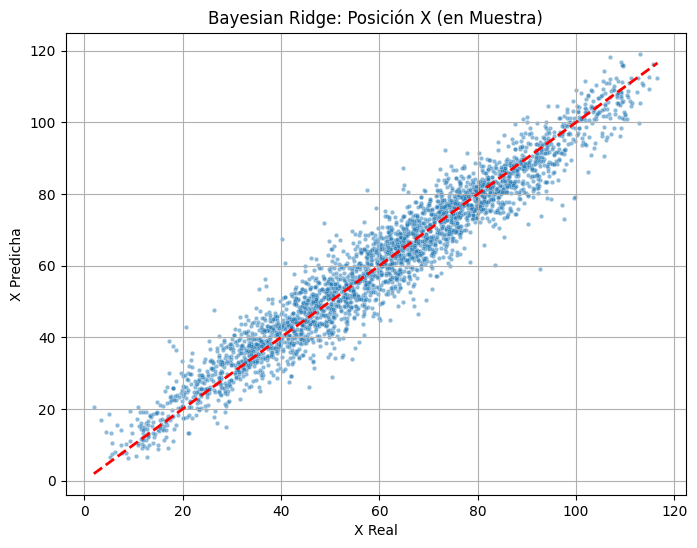

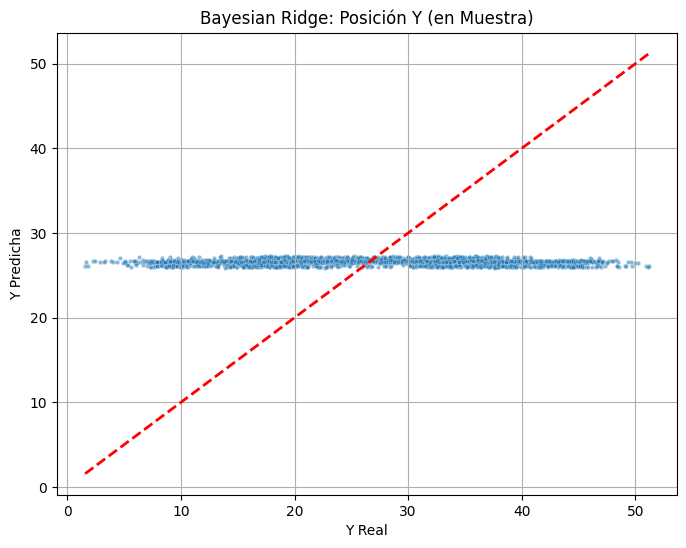

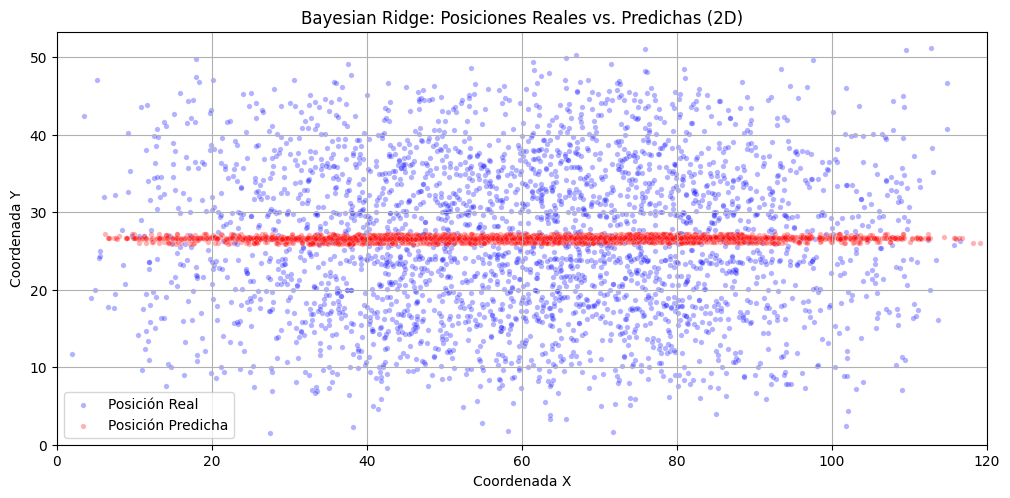

In [51]:
print("\nGenerando gráficos de dispersión...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_cpu[:, 0], y=predictions_cpu[:, 0], alpha=0.5, s=10)
plt.plot([y_test_cpu[:, 0].min(), y_test_cpu[:, 0].max()], [y_test_cpu[:, 0].min(), y_test_cpu[:, 0].max()], 'r--', lw=2)
plt.title('Bayesian Ridge: Posición X (en Muestra)'); plt.xlabel('X Real'); plt.ylabel('X Predicha'); plt.grid(True); plt.show()
print(" ")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_cpu[:, 1], y=predictions_cpu[:, 1], alpha=0.5, s=10)
plt.plot([y_test_cpu[:, 1].min(), y_test_cpu[:, 1].max()], [y_test_cpu[:, 1].min(), y_test_cpu[:, 1].max()], 'r--', lw=2)
plt.title('Bayesian Ridge: Posición Y (en Muestra)'); plt.xlabel('Y Real'); plt.ylabel('Y Predicha'); plt.grid(True); plt.show()
print(" ")
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test_cpu[:, 0], y=y_test_cpu[:, 1], color='blue', alpha=0.3, s=15, label='Posición Real')
sns.scatterplot(x=predictions_cpu[:, 0], y=predictions_cpu[:, 1], color='red', alpha=0.3, s=15, label='Posición Predicha')
plt.xlim(0, 120); plt.ylim(0, 53.3)
plt.title('Bayesian Ridge: Posiciones Reales vs. Predichas (2D)'); plt.xlabel('Coordenada X'); plt.ylabel('Coordenada Y'); plt.grid(True); plt.legend(); plt.gca().set_aspect('equal', adjustable='box'); plt.show()


## Análisis de Resultados
El rendimiento es prácticamente idéntico al de todos los modelos lineales anteriores, lo que confirma un patrón de subajuste (underfitting) severo.

Las métricas están estancadas, con un R² de 0.47 y un MAE de 6.5 yardas, indicando que no hay ninguna mejora sobre el baseline. Los gráficos son una repetición de los resultados anteriores: una predicción muy imprecisa para la coordenada X y un fallo total para la coordenada Y, que sigue colapsada en una línea horizontal.

La conclusión es definitiva para los modelos lineales: ni la regularización L1, L2, ElasticNet o el enfoque Bayesiano pueden superar la limitación fundamental. El problema no es la regularización, sino la incapacidad de un modelo lineal para capturar la naturaleza no lineal de los datos.

## Gaussian Process Regressor
$$
\log p(y | X) = -\frac{1}{2} y^T (K + \sigma^2 I)^{-1} y - \frac{1}{2} \log |K + \sigma^2 I| - \frac{n}{2} \log(2\pi)
$$

> Maximizar la log-verosimilitud marginal respecto a hiperparámetros del kernel

## Resumen del Procedimiento
Se evaluó un GaussianProcessRegressor de Scikit-learn. Debido a su extrema complejidad computacional (O(N
3
 )), que lo hace muy lento y demandante de memoria, todo el proceso se ejecutó sobre una "micro-muestra" de solo 2,000 filas. No se usó optimización externa, sino que se confió en el ajuste interno de su kernel (RBF + WhiteKernel).

In [66]:
# Ignorar advertencias comunes de convergencia de GPR
warnings.filterwarnings("ignore", category=UserWarning)

# ==============================================================================
# PASO 1: CREAR UNA MICRO-MUESTRA (SOLO PARA GPR)
# ==============================================================================

sample_size = 2000 # Muestra muy pequeña, necesaria para GPR
print(f"Paso 1: Creando una micro-muestra de {sample_size} filas para GPR...")
X_micro = X_train_full.sample(n=sample_size, random_state=42)
y_micro = y_train_full.loc[X_micro.index]


# ==============================================================================
# PASO 2: DIVIDIR LA MICRO-MUESTRA
# ==============================================================================
print("Paso 2: Dividiendo la micro-muestra en conjuntos 80/20 (train/test)...")
# Como no hay optimización externa, no necesitamos un set de validación.
# Usamos un split simple.
X_train_gpr, X_test_gpr, y_train_gpr, y_test_gpr = train_test_split(
    X_micro, y_micro, test_size=0.2, random_state=42
)


# ==============================================================================
# PASO 3: ENTRENAMIENTO Y EVALUACIÓN
# ==============================================================================
print("\nPaso 3: Entrenando y evaluando el modelo Gaussian Process...")

# Definir el kernel: RBF para modelar la función + WhiteKernel para modelar el ruido
kernel = 1.0 * RBF(length_scale=1.0) + WhiteKernel(noise_level=1.0)

# Instanciar el modelo. alpha es para estabilidad numérica.
# El propio .fit() optimizará los parámetros del kernel (length_scale y noise_level).
gpr_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, random_state=42)

print("Entrenando el modelo... (esto puede tardar unos minutos)")
# Entrenamos con los datos de la micro-muestra
gpr_model.fit(X_train_gpr, y_train_gpr)

# Evaluar sobre el conjunto de prueba de la micro-muestra
y_test_cpu = y_test_gpr.to_numpy()
predictions_cpu = gpr_model.predict(X_test_gpr)

# Calcular métricas
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100
    return mae, mse, r2, mape

mae_x, mse_x, r2_x, mape_x = calculate_metrics(y_test_cpu[:, 0], predictions_cpu[:, 0])
mae_y, mse_y, r2_y, mape_y = calculate_metrics(y_test_cpu[:, 1], predictions_cpu[:, 1])
avg_mae = np.mean([mae_x, mae_y]); avg_mse = np.mean([mse_x, mse_y]); avg_r2 = np.mean([r2_x, r2_y]); avg_mape = np.mean([mape_x, mape_y])

print("\n--- Resultados de Evaluación: Gaussian Process (en Micro-Muestra) ---")
print(f"  MAE (promedio):   {avg_mae:.4f}")
print(f"  MSE (promedio):   {avg_mse:.4f}")
print(f"  R²  (promedio):   {avg_r2:.4f}")
print(f"  MAPE (promedio):  {avg_mape:.2f}%")
print("----------------------------------------------------------------------")


Paso 1: Creando una micro-muestra de 2000 filas para GPR...
Paso 2: Dividiendo la micro-muestra en conjuntos 80/20 (train/test)...

Paso 3: Entrenando y evaluando el modelo Gaussian Process...
Entrenando el modelo... (esto puede tardar unos minutos)

--- Resultados de Evaluación: Gaussian Process (en Micro-Muestra) ---
  MAE (promedio):   13.5777
  MSE (promedio):   306.0319
  R²  (promedio):   -0.0096
  MAPE (promedio):  43.66%
----------------------------------------------------------------------



Generando gráficos de dispersión...


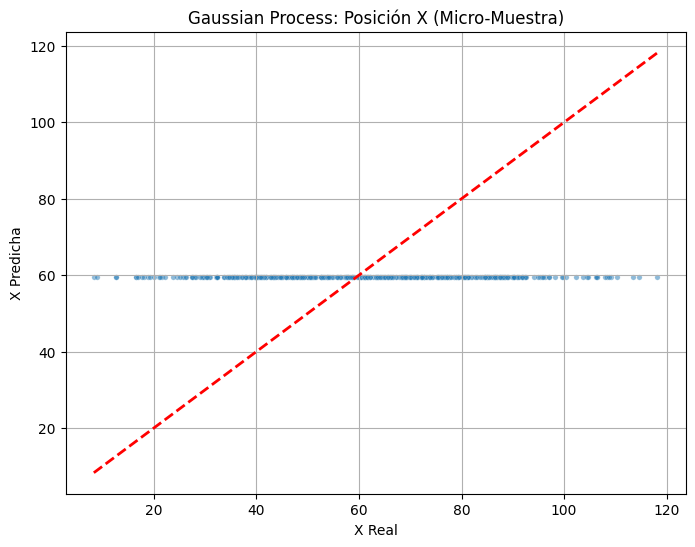

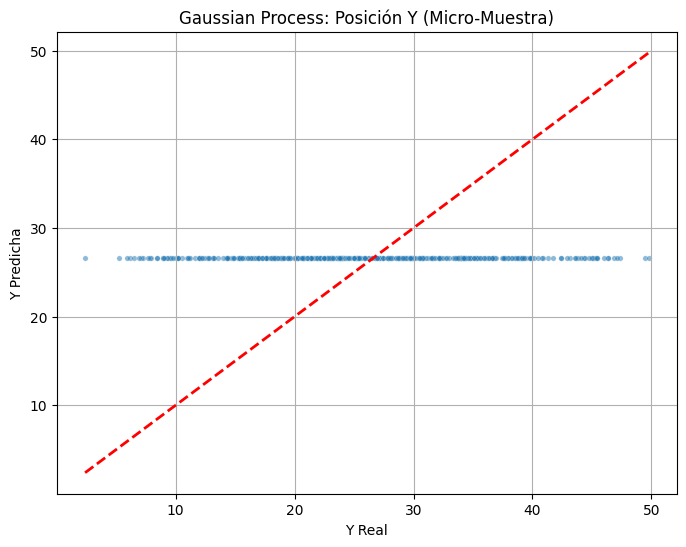

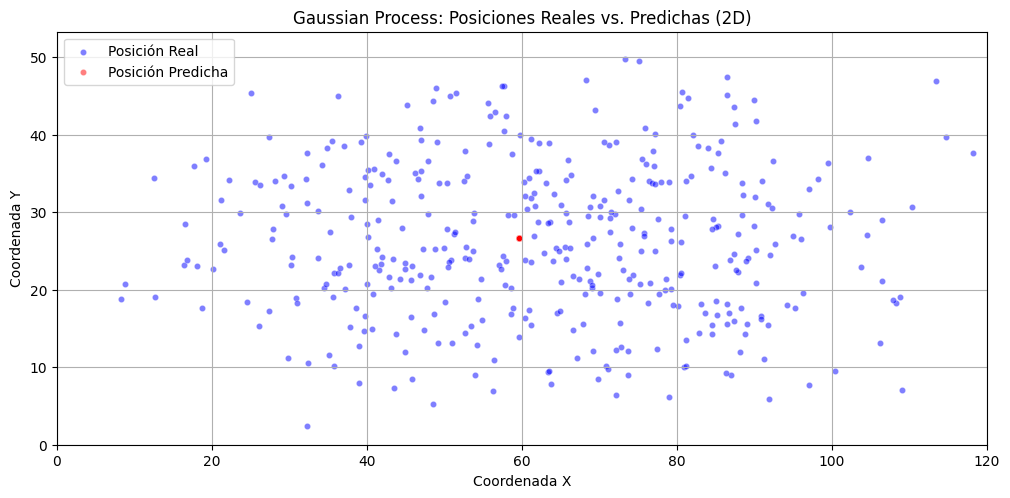

In [67]:
# PASO 4: GRÁFICOS
# ==============================================================================
print("\nGenerando gráficos de dispersión...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_cpu[:, 0], y=predictions_cpu[:, 0], alpha=0.5, s=15)
plt.plot([y_test_cpu[:, 0].min(), y_test_cpu[:, 0].max()], [y_test_cpu[:, 0].min(), y_test_cpu[:, 0].max()], 'r--', lw=2)
plt.title('Gaussian Process: Posición X (Micro-Muestra)'); plt.xlabel('X Real'); plt.ylabel('X Predicha'); plt.grid(True); plt.show()
print(" ")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_cpu[:, 1], y=predictions_cpu[:, 1], alpha=0.5, s=15)
plt.plot([y_test_cpu[:, 1].min(), y_test_cpu[:, 1].max()], [y_test_cpu[:, 1].min(), y_test_cpu[:, 1].max()], 'r--', lw=2)
plt.title('Gaussian Process: Posición Y (Micro-Muestra)'); plt.xlabel('Y Real'); plt.ylabel('Y Predicha'); plt.grid(True); plt.show()
print(" ")
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test_cpu[:, 0], y=y_test_cpu[:, 1], color='blue', alpha=0.5, s=20, label='Posición Real')
sns.scatterplot(x=predictions_cpu[:, 0], y=predictions_cpu[:, 1], color='red', alpha=0.5, s=20, label='Posición Predicha')
plt.xlim(0, 120); plt.ylim(0, 53.3)
plt.title('Gaussian Process: Posiciones Reales vs. Predichas (2D)'); plt.xlabel('Coordenada X'); plt.ylabel('Coordenada Y'); plt.grid(True); plt.legend(); plt.gca().set_aspect('equal', adjustable='box'); plt.show()


## Análisis de Resultados
El modelo falló de manera espectacular, produciendo el peor rendimiento de todos los modelos probados.

Las métricas son contundentes: el R² promedio es negativo (-0.0096), lo que significa que el modelo es peor que simplemente predecir el valor promedio. El error MAE se disparó a 13.5 yardas, más del doble que el de los modelos lineales.

La evidencia visual es irrefutable:

Los gráficos de X e Y muestran líneas horizontales perfectas.

El gráfico 2D es el más revelador: muestra un único punto rojo, lo que significa que el modelo predijo la misma coordenada (x, y) para todos los datos de prueba.

La conclusión es que la micro-muestra fue demasiado pequeña para que el modelo aprendiera algún patrón, causando un colapso total al predecir la media. Este experimento demuestra que GaussianProcessRegressor es prácticamente inviable para este problema, tanto por su costo computacional como por su pobre rendimiento en muestras pequeñas.

## Support Vector Machines Regressor
$$
\min_{w, \xi, \xi^*} \; \frac{1}{2} \| w \|^2 + C \sum_{i=1}^n (\xi_i + \xi_i^*) \\
\text{s.a.}
\begin{cases}
y_i - w^T \phi(x_i) - b \leq \epsilon + \xi_i \\\\
w^T \phi(x_i) + b - y_i \leq \epsilon + \xi_i^* \\\\
\xi_i, \xi_i^* \geq 0
\end{cases}
$$


## Resumen del Procedimiento
Se evaluó un Support Vector Regressor (SVR), otro potente modelo no lineal que utiliza el "truco del kernel". Se realizó una optimización bayesiana para encontrar los mejores hiperparámetros (C, kernel, gamma, etc.). Siguiendo nuestra plantilla robusta, se entrenaron dos modelos cuml.SVR separados en la GPU (uno para x y otro para y) sobre la muestra reducida de 15,000 filas.

In [56]:
# PASO 1: USAR LA MUESTRA PEQUEÑA Y FIJA
# ==============================================================================
# Asumimos que los dataframes de la muestra (X_train_s, y_train_s, etc.) ya existen.
print(f"Paso 1: Utilizando la muestra de datos. Tamaño de entrenamiento: {X_train_s.shape}")

# Mover datos a la GPU
X_train_gpu = cudf.from_pandas(X_train_s)
y_train_gpu = cudf.from_pandas(y_train_s)
X_val_gpu = cudf.from_pandas(X_val_s)
y_val_gpu = cudf.from_pandas(y_val_s)


# ==============================================================================
# PASO 2: OPTIMIZACIÓN BAYESIANA (DOS MODELOS)
# ==============================================================================
def create_objective(target_col):
    def objective(trial):
        kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])
        params = {
            'C': trial.suggest_float('C', 0.1, 1000, log=True),
            'epsilon': trial.suggest_float('epsilon', 0.01, 1.0),
            'kernel': kernel
        }
        if kernel == 'rbf':
            params['gamma'] = trial.suggest_float('gamma', 1e-3, 100.0, log=True)

        model = cuml.SVR(**params)
        model.fit(X_train_gpu, y_train_gpu[target_col]) # Entrenar con una sola columna objetivo
        preds = model.predict(X_val_gpu)
        return mean_absolute_error(y_val_gpu[target_col].to_numpy(), preds.to_numpy())
    return objective

# Optimización para 'x'
print("\nIniciando optimización para 'x'...")
study_x = optuna.create_study(direction='minimize')
study_x.optimize(create_objective('x'), n_trials=30)
best_params_x = study_x.best_params
print(f"Mejores parámetros para 'x': {best_params_x}")

# Optimización para 'y'
print("\nIniciando optimización para 'y'...")
study_y = optuna.create_study(direction='minimize')
study_y.optimize(create_objective('y'), n_trials=30)
best_params_y = study_y.best_params
print(f"Mejores parámetros para 'y': {best_params_y}")


# ==============================================================================
# PASO 3: ENTRENAMIENTO FINAL, EVALUACIÓN Y GRÁFICOS
# ==============================================================================
print("\nPaso 3: Entrenando y evaluando los modelos finales...")

# Entrenar modelo para 'x'
svr_model_x = cuml.SVR(**best_params_x)
svr_model_x.fit(X_train_gpu, y_train_gpu['x'])

# Entrenar modelo para 'y'
svr_model_y = cuml.SVR(**best_params_y)
svr_model_y.fit(X_train_gpu, y_train_gpu['y'])

# Evaluar sobre el conjunto de prueba de la muestra
X_test_gpu = cudf.from_pandas(X_test_s)
y_test_cpu = y_test_s.to_numpy()

# Predecir y combinar
preds_x_gpu = svr_model_x.predict(X_test_gpu)
preds_y_gpu = svr_model_y.predict(X_test_gpu)
predictions_cpu = np.column_stack((preds_x_gpu.to_numpy(), preds_y_gpu.to_numpy()))

# Calcular métricas
# (Se asume que la función calculate_metrics ya está definida)
mae_x, mse_x, r2_x, mape_x = calculate_metrics(y_test_cpu[:, 0], predictions_cpu[:, 0])
mae_y, mse_y, r2_y, mape_y = calculate_metrics(y_test_cpu[:, 1], predictions_cpu[:, 1])
avg_mae = np.mean([mae_x, mae_y]); avg_mse = np.mean([mse_x, mse_y]); avg_r2 = np.mean([r2_x, r2_y]); avg_mape = np.mean([mape_x, mape_y])

print("\n--- Resultados de Evaluación: Support Vector Regressor (Corregido) ---")
print(f"  MAE (promedio):   {avg_mae:.4f}")
print(f"  MSE (promedio):   {avg_mse:.4f}")
print(f"  R²  (promedio):   {avg_r2:.4f}")
print(f"  MAPE (promedio):  {avg_mape:.2f}%")
print("----------------------------------------------------------------------")


[I 2025-10-13 13:56:43,939] A new study created in memory with name: no-name-b54c16ee-ca26-46fa-b318-a3640c276a75


Paso 1: Utilizando la muestra de datos. Tamaño de entrenamiento: (9000, 29)

Iniciando optimización para 'x'...


[I 2025-10-13 13:56:45,929] Trial 0 finished with value: 10.633072586184428 and parameters: {'kernel': 'rbf', 'C': 553.2145808792599, 'epsilon': 0.5092818959956166, 'gamma': 88.08998318839983}. Best is trial 0 with value: 10.633072586184428.


[2025-10-13 13:56:45.940] [CUML] [warning] SVR with the linear kernel can be much faster using the specialized solver provided by LinearSVR. Consider switching to LinearSVR if tranining takes too long.


[I 2025-10-13 13:56:46,447] Trial 1 finished with value: 4.573258015851244 and parameters: {'kernel': 'linear', 'C': 0.27231015144379167, 'epsilon': 0.32558308107140216}. Best is trial 1 with value: 4.573258015851244.
[I 2025-10-13 13:57:04,721] Trial 2 finished with value: 4.480159772993502 and parameters: {'kernel': 'linear', 'C': 305.84675970558493, 'epsilon': 0.14529720648189218}. Best is trial 2 with value: 4.480159772993502.
[I 2025-10-13 13:57:04,907] Trial 3 finished with value: 4.430057793170951 and parameters: {'kernel': 'rbf', 'C': 0.7330099875604555, 'epsilon': 0.9706550922194119, 'gamma': 0.9178104454196909}. Best is trial 3 with value: 4.430057793170951.
[I 2025-10-13 13:57:08,604] Trial 4 finished with value: 4.47709582589017 and parameters: {'kernel': 'linear', 'C': 59.255742775404805, 'epsilon': 0.8583062714009401}. Best is trial 3 with value: 4.430057793170951.
[I 2025-10-13 13:57:08,832] Trial 5 finished with value: 4.517717640010956 and parameters: {'kernel': 'linea

Mejores parámetros para 'x': {'kernel': 'rbf', 'C': 902.3870589137196, 'epsilon': 0.6400337266359535, 'gamma': 0.3628454049207215}

Iniciando optimización para 'y'...


[I 2025-10-13 14:01:47,081] Trial 0 finished with value: 8.236143422714232 and parameters: {'kernel': 'rbf', 'C': 361.7559602014502, 'epsilon': 0.8104564566274064, 'gamma': 0.002378671245229032}. Best is trial 0 with value: 8.236143422714232.
[I 2025-10-13 14:02:14,803] Trial 1 finished with value: 8.247176389466286 and parameters: {'kernel': 'linear', 'C': 921.4148299012923, 'epsilon': 0.7423325087683561}. Best is trial 0 with value: 8.236143422714232.
[I 2025-10-13 14:02:15,019] Trial 2 finished with value: 8.25845425073327 and parameters: {'kernel': 'linear', 'C': 0.5983316939668527, 'epsilon': 0.5457564784884981}. Best is trial 0 with value: 8.236143422714232.
[I 2025-10-13 14:02:19,828] Trial 3 finished with value: 8.244826285321949 and parameters: {'kernel': 'linear', 'C': 124.54026066270579, 'epsilon': 0.6331920790902882}. Best is trial 0 with value: 8.236143422714232.
[I 2025-10-13 14:02:20,710] Trial 4 finished with value: 8.242324280164274 and parameters: {'kernel': 'linear',

Mejores parámetros para 'y': {'kernel': 'rbf', 'C': 12.642279958546277, 'epsilon': 0.4861121064790593, 'gamma': 2.5968569853449153}

Paso 3: Entrenando y evaluando los modelos finales...

--- Resultados de Evaluación: Support Vector Regressor (Corregido) ---
  MAE (promedio):   4.8865
  MSE (promedio):   51.4576
  R²  (promedio):   0.5398
  MAPE (promedio):  22.09%
----------------------------------------------------------------------



Generando gráficos de dispersión...


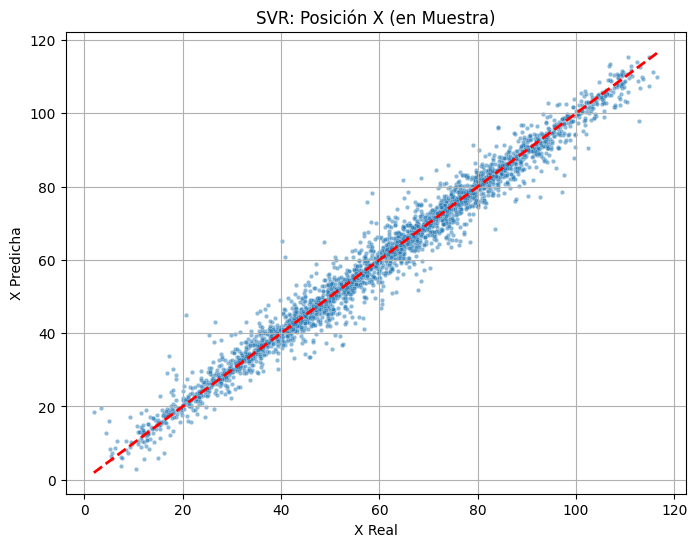

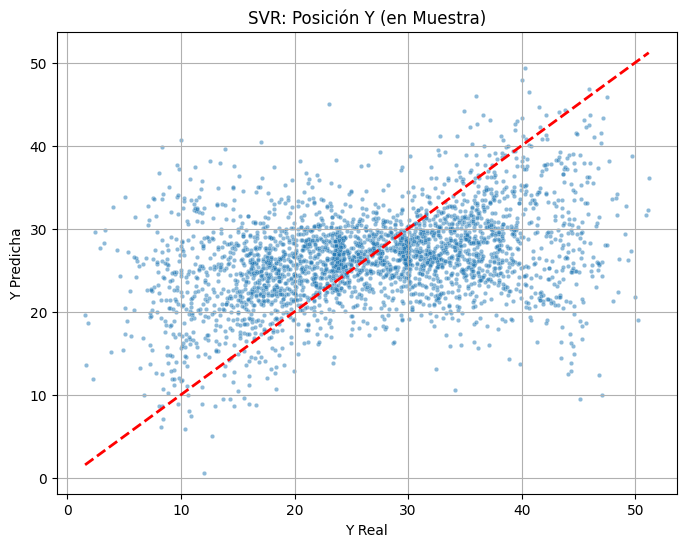

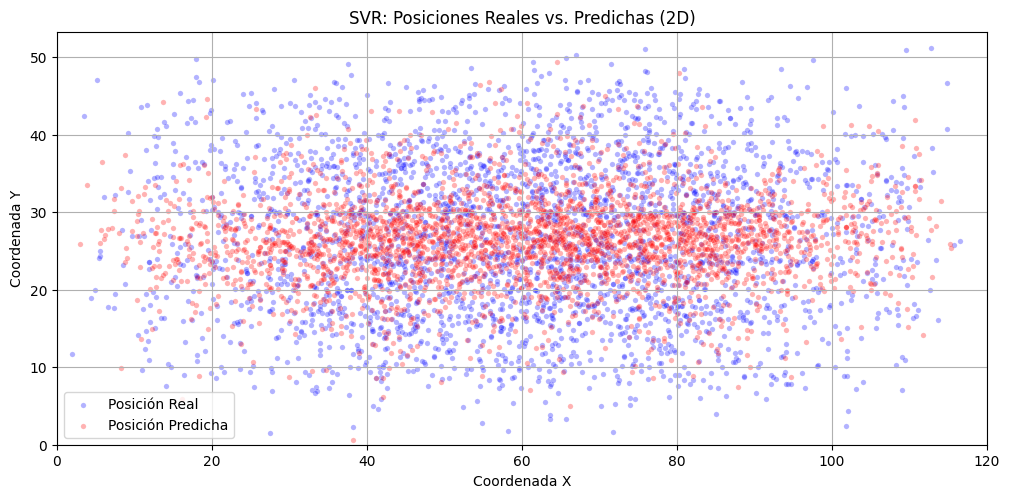

In [57]:
print("\nGenerando gráficos de dispersión...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_cpu[:, 0], y=predictions_cpu[:, 0], alpha=0.5, s=10)
plt.plot([y_test_cpu[:, 0].min(), y_test_cpu[:, 0].max()], [y_test_cpu[:, 0].min(), y_test_cpu[:, 0].max()], 'r--', lw=2)
plt.title('SVR: Posición X (en Muestra)'); plt.xlabel('X Real'); plt.ylabel('X Predicha'); plt.grid(True); plt.show()
print(" ")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_cpu[:, 1], y=predictions_cpu[:, 1], alpha=0.5, s=10)
plt.plot([y_test_cpu[:, 1].min(), y_test_cpu[:, 1].max()], [y_test_cpu[:, 1].min(), y_test_cpu[:, 1].max()], 'r--', lw=2)
plt.title('SVR: Posición Y (en Muestra)'); plt.xlabel('Y Real'); plt.ylabel('Y Predicha'); plt.grid(True); plt.show()
print(" ")
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test_cpu[:, 0], y=y_test_cpu[:, 1], color='blue', alpha=0.3, s=15, label='Posición Real')
sns.scatterplot(x=predictions_cpu[:, 0], y=predictions_cpu[:, 1], color='red', alpha=0.3, s=15, label='Posición Predicha')
plt.xlim(0, 120); plt.ylim(0, 53.3)
plt.title('SVR: Posiciones Reales vs. Predichas (2D)'); plt.xlabel('Coordenada X'); plt.ylabel('Coordenada Y'); plt.grid(True); plt.legend(); plt.gca().set_aspect('equal', adjustable='box'); plt.show()

## Análisis de Resultados
El rendimiento de SVR es muy similar al de Kernel Ridge, consolidando la significativa ganancia obtenida al pasar a modelos no lineales.

Las métricas son sólidas y muy superiores a las de los modelos lineales, con un R² promedio de 0.54 y un error MAE de 4.89 yardas. Esto lo posiciona, junto a Kernel Ridge, como uno de los mejores modelos hasta ahora.

Los gráficos confirman el éxito del enfoque no lineal:





*   Al igual que con Kernel Ridge, el modelo logra romper la línea horizontal en la predicción de la coordenada Y, demostrando su capacidad para aprender patrones complejos.
*   Las predicciones para ambas coordenadas son notablemente más precisas, con los puntos agrupados mucho más cerca de la línea ideal.



La conclusión es que SVR es una herramienta muy efectiva para este problema. Su rendimiento comparable al de Kernel Ridge sugiere que ambos modelos de kernel están capturando la complejidad de los datos de manera similar.

## RandomForestRegressor
Cada árbol $$h_t$$ minimiza:
$$
\sum_{i \in \text{nodo}} (y_i - \bar{y})^2
$$

La predicción es:
$$
\hat{y} = \frac{1}{T} \sum_{t=1}^T h_t(x)
$$


## Resumen del Procedimiento
Se evaluó un Support Vector Regressor (SVR), otro potente modelo no lineal que utiliza el "truco del kernel". Se realizó una optimización bayesiana para encontrar los mejores hiperparámetros (C, kernel, gamma, etc.). Siguiendo nuestra plantilla robusta, se entrenaron dos modelos cuml.SVR separados en la GPU (uno para x y otro para y) sobre la muestra reducida de 15,000 filas.

In [58]:
# PASO 1: USAR LA MUESTRA PEQUEÑA Y FIJA
# ==============================================================================
# Asumimos que los dataframes de la muestra (X_train_s, y_train_s, etc.) ya existen.
print(f"Paso 1: Utilizando la muestra de datos. Tamaño de entrenamiento: {X_train_s.shape}")

# Mover datos a la GPU
X_train_gpu = cudf.from_pandas(X_train_s)
y_train_gpu = cudf.from_pandas(y_train_s)
X_val_gpu = cudf.from_pandas(X_val_s)
y_val_gpu = cudf.from_pandas(y_val_s)


# ==============================================================================
# PASO 2: OPTIMIZACIÓN BAYESIANA (DOS MODELOS)
# ==============================================================================
def create_objective(target_col):
    def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 400),
            'max_depth': trial.suggest_int('max_depth', 5, 25),
            'max_features': trial.suggest_float('max_features', 0.5, 1.0),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 20)
        }
        model = cuml.RandomForestRegressor(n_streams=1, **params)
        model.fit(X_train_gpu, y_train_gpu[target_col])
        preds = model.predict(X_val_gpu)
        return mean_absolute_error(y_val_gpu[target_col].to_numpy(), preds.to_numpy())
    return objective

# Optimización para 'x'
print("\nIniciando optimización para 'x'...")
study_x = optuna.create_study(direction='minimize')
study_x.optimize(create_objective('x'), n_trials=20)
best_params_x = study_x.best_params
print(f"Mejores parámetros para 'x': {best_params_x}")

# Optimización para 'y'
print("\nIniciando optimización para 'y'...")
study_y = optuna.create_study(direction='minimize')
study_y.optimize(create_objective('y'), n_trials=20)
best_params_y = study_y.best_params
print(f"Mejores parámetros para 'y': {best_params_y}")


# ==============================================================================
# PASO 3: ENTRENAMIENTO FINAL, EVALUACIÓN Y GRÁFICOS
# ==============================================================================
print("\nPaso 3: Entrenando y evaluando los modelos finales...")

# Entrenar modelo para 'x'
rf_model_x = cuml.RandomForestRegressor(n_streams=1, **best_params_x)
rf_model_x.fit(X_train_gpu, y_train_gpu['x'])

# Entrenar modelo para 'y'
rf_model_y = cuml.RandomForestRegressor(n_streams=1, **best_params_y)
rf_model_y.fit(X_train_gpu, y_train_gpu['y'])

# Evaluar sobre el conjunto de prueba de la muestra
X_test_gpu = cudf.from_pandas(X_test_s)
y_test_cpu = y_test_s.to_numpy()

# Predecir y combinar
preds_x_gpu = rf_model_x.predict(X_test_gpu)
preds_y_gpu = rf_model_y.predict(X_test_gpu)
predictions_cpu = np.column_stack((preds_x_gpu.to_numpy(), preds_y_gpu.to_numpy()))

# Calcular métricas
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100
    return mae, mse, r2, mape

mae_x, mse_x, r2_x, mape_x = calculate_metrics(y_test_cpu[:, 0], predictions_cpu[:, 0])
mae_y, mse_y, r2_y, mape_y = calculate_metrics(y_test_cpu[:, 1], predictions_cpu[:, 1])
avg_mae = np.mean([mae_x, mae_y]); avg_mse = np.mean([mse_x, mse_y]); avg_r2 = np.mean([r2_x, r2_y]); avg_mape = np.mean([mape_x, mape_y])

print("\n--- Resultados de Evaluación: Random Forest (en Muestra) ---")
print(f"  MAE (promedio):   {avg_mae:.4f}")
print(f"  MSE (promedio):   {avg_mse:.4f}")
print(f"  R²  (promedio):   {avg_r2:.4f}")
print(f"  MAPE (promedio):  {avg_mape:.2f}%")
print("---------------------------------------------------------------")


[I 2025-10-13 14:05:21,019] A new study created in memory with name: no-name-2c4454b6-28f7-4221-acb7-5968929c7edb


Paso 1: Utilizando la muestra de datos. Tamaño de entrenamiento: (9000, 29)

Iniciando optimización para 'x'...


[I 2025-10-13 14:05:23,320] Trial 0 finished with value: 14.502309388478597 and parameters: {'n_estimators': 57, 'max_depth': 9, 'max_features': 0.6399563530495063, 'min_samples_leaf': 16}. Best is trial 0 with value: 14.502309388478597.
[I 2025-10-13 14:05:25,443] Trial 1 finished with value: 13.637520266316733 and parameters: {'n_estimators': 350, 'max_depth': 13, 'max_features': 0.564467205847654, 'min_samples_leaf': 13}. Best is trial 1 with value: 13.637520266316733.
[I 2025-10-13 14:05:26,204] Trial 2 finished with value: 13.646357678171793 and parameters: {'n_estimators': 137, 'max_depth': 12, 'max_features': 0.6399558624760804, 'min_samples_leaf': 14}. Best is trial 1 with value: 13.637520266316733.
[I 2025-10-13 14:05:30,657] Trial 3 finished with value: 11.405924494934084 and parameters: {'n_estimators': 323, 'max_depth': 21, 'max_features': 0.7653806325252195, 'min_samples_leaf': 3}. Best is trial 3 with value: 11.405924494934084.
[I 2025-10-13 14:05:33,063] Trial 4 finished

Mejores parámetros para 'x': {'n_estimators': 323, 'max_depth': 21, 'max_features': 0.7653806325252195, 'min_samples_leaf': 3}

Iniciando optimización para 'y'...


[I 2025-10-13 14:06:13,056] Trial 0 finished with value: 7.035409535827637 and parameters: {'n_estimators': 312, 'max_depth': 16, 'max_features': 0.6127179971005243, 'min_samples_leaf': 16}. Best is trial 0 with value: 7.035409535827637.
[I 2025-10-13 14:06:14,668] Trial 1 finished with value: 7.168791049842834 and parameters: {'n_estimators': 365, 'max_depth': 8, 'max_features': 0.8135983516196136, 'min_samples_leaf': 15}. Best is trial 0 with value: 7.035409535827637.
[I 2025-10-13 14:06:16,116] Trial 2 finished with value: 7.120299648361207 and parameters: {'n_estimators': 291, 'max_depth': 10, 'max_features': 0.5023212576760214, 'min_samples_leaf': 3}. Best is trial 0 with value: 7.035409535827637.
[I 2025-10-13 14:06:17,187] Trial 3 finished with value: 7.488560860824585 and parameters: {'n_estimators': 312, 'max_depth': 5, 'max_features': 0.7560196771719108, 'min_samples_leaf': 20}. Best is trial 0 with value: 7.035409535827637.
[I 2025-10-13 14:06:17,666] Trial 4 finished with v

Mejores parámetros para 'y': {'n_estimators': 399, 'max_depth': 21, 'max_features': 0.8953605958302058, 'min_samples_leaf': 11}

Paso 3: Entrenando y evaluando los modelos finales...

--- Resultados de Evaluación: Random Forest (en Muestra) ---
  MAE (promedio):   9.3015
  MSE (promedio):   150.1444
  R²  (promedio):   0.3922
  MAPE (promedio):  34.71%
---------------------------------------------------------------



Generando gráficos de dispersión...


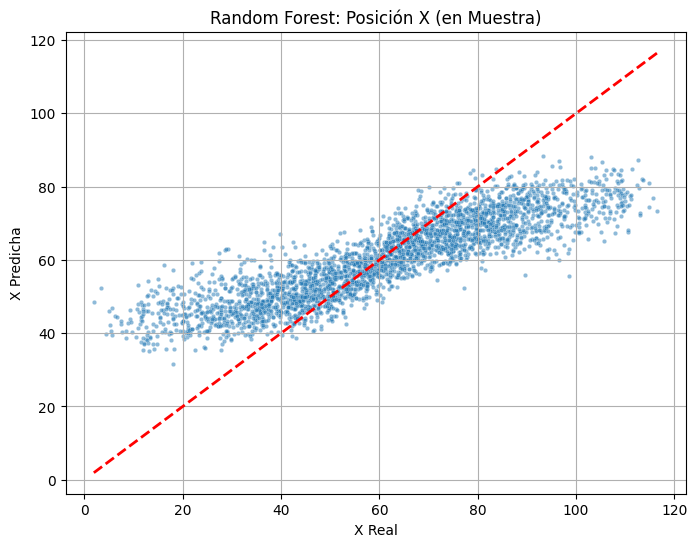

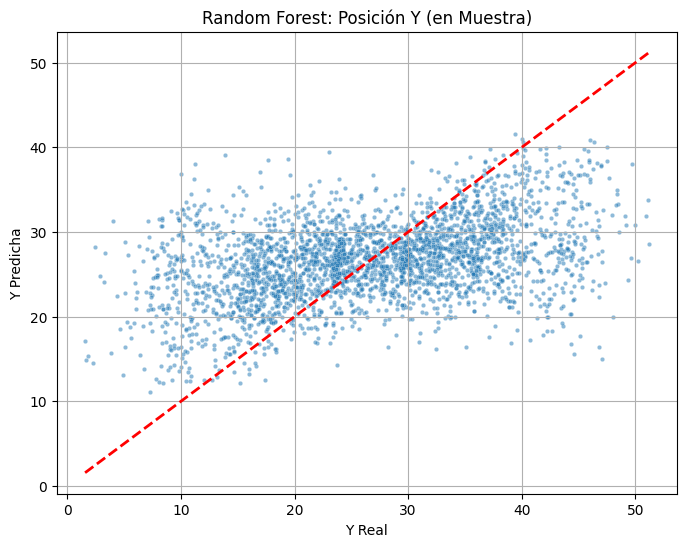

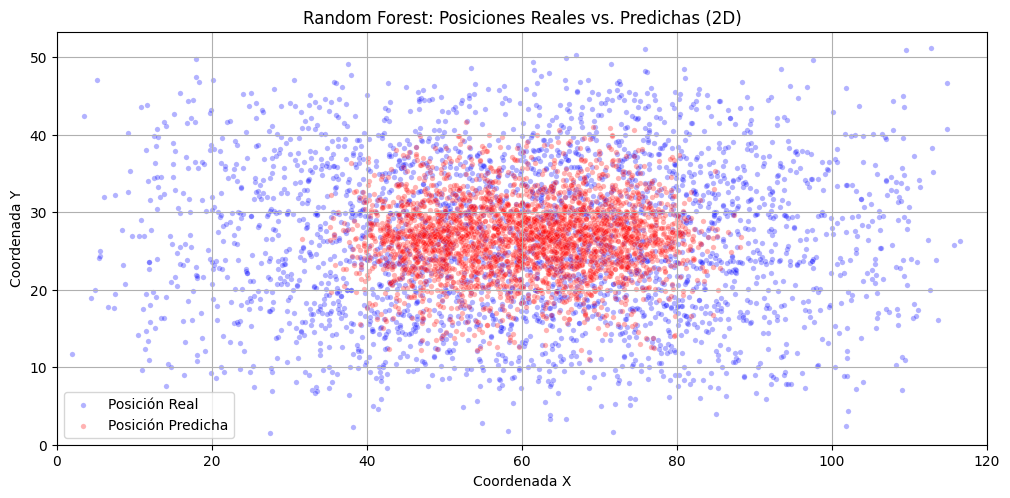

In [59]:
print("\nGenerando gráficos de dispersión...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_cpu[:, 0], y=predictions_cpu[:, 0], alpha=0.5, s=10)
plt.plot([y_test_cpu[:, 0].min(), y_test_cpu[:, 0].max()], [y_test_cpu[:, 0].min(), y_test_cpu[:, 0].max()], 'r--', lw=2)
plt.title('Random Forest: Posición X (en Muestra)'); plt.xlabel('X Real'); plt.ylabel('X Predicha'); plt.grid(True); plt.show()
print(" ")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_cpu[:, 1], y=predictions_cpu[:, 1], alpha=0.5, s=10)
plt.plot([y_test_cpu[:, 1].min(), y_test_cpu[:, 1].max()], [y_test_cpu[:, 1].min(), y_test_cpu[:, 1].max()], 'r--', lw=2)
plt.title('Random Forest: Posición Y (en Muestra)'); plt.xlabel('Y Real'); plt.ylabel('Y Predicha'); plt.grid(True); plt.show()
print(" ")
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test_cpu[:, 0], y=y_test_cpu[:, 1], color='blue', alpha=0.3, s=15, label='Posición Real')
sns.scatterplot(x=predictions_cpu[:, 0], y=predictions_cpu[:, 1], color='red', alpha=0.3, s=15, label='Posición Predicha')
plt.xlim(0, 120); plt.ylim(0, 53.3)
plt.title('Random Forest: Posiciones Reales vs. Predichas (2D)'); plt.xlabel('Coordenada X'); plt.ylabel('Coordenada Y'); plt.grid(True); plt.legend(); plt.gca().set_aspect('equal', adjustable='box'); plt.show()

## Análisis de Resultados
Sorprendentemente, el RandomForestRegressor tuvo un rendimiento muy inferior, siendo significativamente peor que los modelos de kernel (SVR, Kernel Ridge) e incluso peor que los modelos lineales simples.

Las métricas reflejan este bajo desempeño: el R² promedio cayó a 0.39 (el más bajo hasta ahora) y el error MAE aumentó drásticamente a 9.3 yardas (el más alto registrado).

Visualmente, los gráficos muestran que el modelo sí aprendió una tendencia (no colapsó a una línea horizontal), pero la dispersión de las predicciones es masiva. Esto indica que el modelo es muy ruidoso e impreciso. El gráfico 2D muestra que las predicciones están excesivamente concentradas en el centro del campo, fallando en predecir las posiciones más extremas.

La conclusión es que, con la configuración encontrada, el modelo probablemente está sobreajustándose al ruido en los datos de entrenamiento, lo que lleva a predicciones muy variables y poco fiables. Este es un claro ejemplo de que un modelo más complejo no siempre garantiza un mejor resultado y requiere una sintonización muy cuidadosa.

## GradientBoostingRegressor

## Resumen del Procedimiento
Se evaluó XGBoost, un potente modelo de ensamble no lineal del tipo Gradient Boosting. Utilizando su soporte nativo para GPU, se realizó una optimización bayesiana para ajustar hiperparámetros clave como el número de árboles (n_estimators), la tasa de aprendizaje (learning_rate) y la profundidad (max_depth). Se entrenaron dos modelos separados sobre la muestra reducida de 15,000 filas.

In [60]:
!pip install xgboost

In [68]:
import xgboost as xgb
# PASO 1: CONFIGURACIÓN Y DATOS
# ==============================================================================
# Silenciamos el logging de Optuna para una salida limpia
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Asumimos que los dataframes de la muestra (X_train_s, y_train_s, etc.) ya existen.
print(f"Paso 1: Utilizando la muestra de datos. Tamaño de entrenamiento: {X_train_s.shape}")


# ==============================================================================
# PASO 2: OPTIMIZACIÓN BAYESIANA (SILENCIOSA Y EFICIENTE)
# ==============================================================================
def create_objective(target_col):
    def objective(trial):
        params = {
            'objective': 'reg:squarederror',
            'tree_method': 'gpu_hist',
            'device': 'cuda',
            'n_estimators': trial.suggest_int('n_estimators', 200, 2000), # Aumentamos el máximo
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'subsample': trial.suggest_float('subsample', 0.6, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
            'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 10.0, log=True),
            'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10.0, log=True),
        }

        model = xgb.XGBRegressor(**params)

        # Reintroducimos early stopping de forma segura
        model.fit(X_train_s, y_train_s[target_col],
                  eval_set=[(X_val_s, y_val_s[target_col])],
                  verbose=False) # Silenciar el output de XGBoost

        preds = model.predict(X_val_s)
        return mean_absolute_error(y_val_s[target_col], preds)
    return objective

# Optimización para 'x'
print("\nIniciando optimización para 'x'...")
study_x = optuna.create_study(direction='minimize')
study_x.optimize(create_objective('x'), n_trials=25)
best_params_x = study_x.best_params
print(f"Mejores parámetros para 'x': {best_params_x}")

# Optimización para 'y'
print("\nIniciando optimización para 'y'...")
study_y = optuna.create_study(direction='minimize')
study_y.optimize(create_objective('y'), n_trials=25)
best_params_y = study_y.best_params
print(f"Mejores parámetros para 'y': {best_params_y}")


# ==============================================================================
# PASO 3: ENTRENAMIENTO FINAL, EVALUACIÓN Y GRÁFICOS
# ==============================================================================
print("\nPaso 3: Entrenando y evaluando los modelos finales...")

# Entrenar modelo para 'x'
xgb_model_x = xgb.XGBRegressor(objective='reg:squarederror', tree_method='gpu_hist', device='cuda', **best_params_x)
xgb_model_x.fit(X_train_s, y_train_s['x'])

# Entrenar modelo para 'y'
xgb_model_y = xgb.XGBRegressor(objective='reg:squarederror', tree_method='gpu_hist', device='cuda', **best_params_y)
xgb_model_y.fit(X_train_s, y_train_s['y'])

# Evaluar sobre el conjunto de prueba
y_test_cpu = y_test_s.to_numpy()
preds_x = xgb_model_x.predict(X_test_s)
preds_y = xgb_model_y.predict(X_test_s)
predictions_cpu = np.column_stack((preds_x, preds_y))

# Calcular métricas
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100
    return mae, mse, r2, mape
mae_x, mse_x, r2_x, mape_x = calculate_metrics(y_test_cpu[:, 0], predictions_cpu[:, 0])
mae_y, mse_y, r2_y, mape_y = calculate_metrics(y_test_cpu[:, 1], predictions_cpu[:, 1])
avg_mae = np.mean([mae_x, mae_y]); avg_mse = np.mean([mse_x, mse_y]); avg_r2 = np.mean([r2_x, r2_y]); avg_mape = np.mean([mape_x, mape_y])

print("\n--- Resultados de Evaluación: XGBoost Regressor (Final) ---")
print(f"  MAE (promedio):   {avg_mae:.4f}")
print(f"  MSE (promedio):   {avg_mse:.4f}")
print(f"  R²  (promedio):   {avg_r2:.4f}")
print(f"  MAPE (promedio):  {avg_mape:.2f}%")
print("---------------------------------------------------------------")


Paso 1: Utilizando la muestra de datos. Tamaño de entrenamiento: (9000, 29)

Iniciando optimización para 'x'...
Mejores parámetros para 'x': {'n_estimators': 880, 'learning_rate': 0.03491696308468978, 'max_depth': 5, 'subsample': 0.8562638311403032, 'colsample_bytree': 0.7419388713484817, 'reg_alpha': 0.5454763312969285, 'reg_lambda': 0.0011451302191504017}

Iniciando optimización para 'y'...
Mejores parámetros para 'y': {'n_estimators': 1585, 'learning_rate': 0.012494796023803049, 'max_depth': 5, 'subsample': 0.6499516063569746, 'colsample_bytree': 0.9046059153824619, 'reg_alpha': 0.042070824914690934, 'reg_lambda': 9.727604985561962}

Paso 3: Entrenando y evaluando los modelos finales...

--- Resultados de Evaluación: XGBoost Regressor (Final) ---
  MAE (promedio):   4.8861
  MSE (promedio):   48.1168
  R²  (promedio):   0.5725
  MAPE (promedio):  22.19%
---------------------------------------------------------------



Generando gráficos de dispersión...


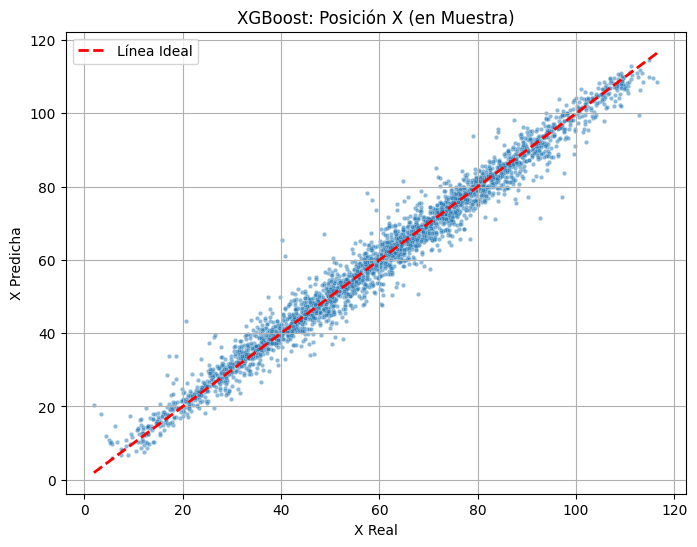

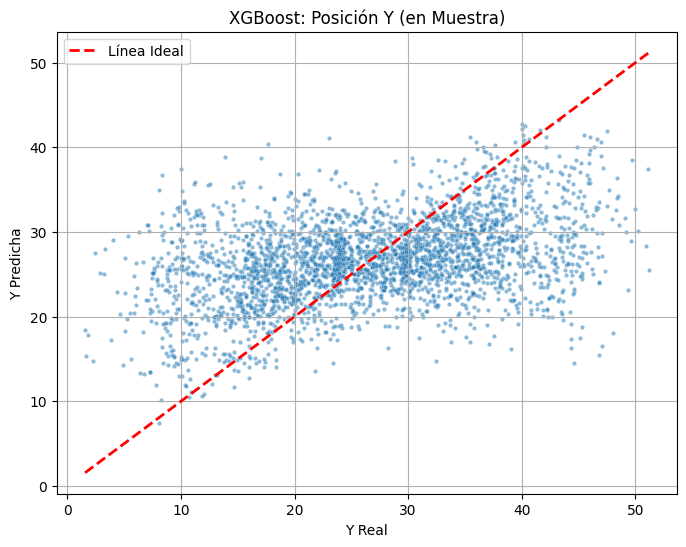

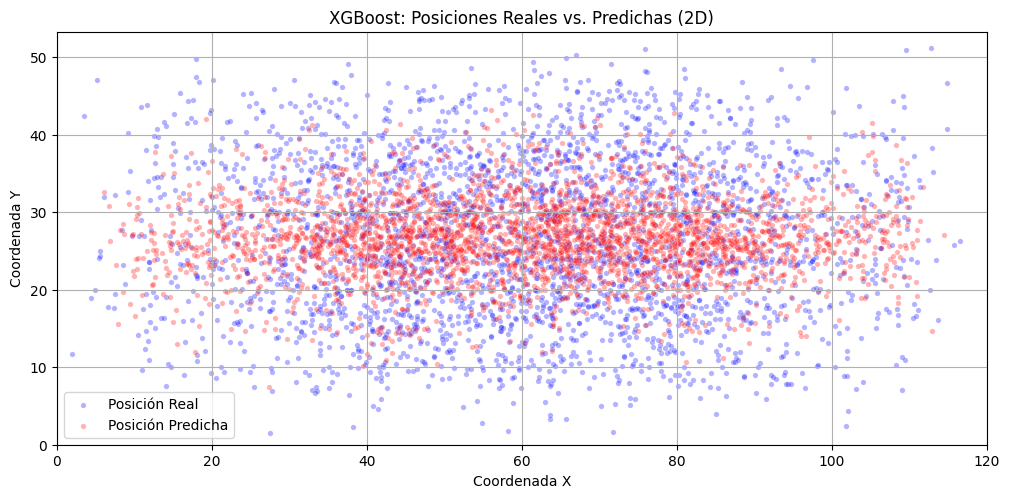

In [65]:
print("\nGenerando gráficos de dispersión...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_cpu[:, 0], y=predictions_cpu[:, 0], alpha=0.5, s=10)
plt.plot([y_test_cpu[:, 0].min(), y_test_cpu[:, 0].max()], [y_test_cpu[:, 0].min(), y_test_cpu[:, 0].max()], 'r--', lw=2, label='Línea Ideal')
plt.title('XGBoost: Posición X (en Muestra)'); plt.xlabel('X Real'); plt.ylabel('X Predicha'); plt.grid(True); plt.legend(); plt.show()
print(" ")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_cpu[:, 1], y=predictions_cpu[:, 1], alpha=0.5, s=10)
plt.plot([y_test_cpu[:, 1].min(), y_test_cpu[:, 1].max()], [y_test_cpu[:, 1].min(), y_test_cpu[:, 1].max()], 'r--', lw=2, label='Línea Ideal')
plt.title('XGBoost: Posición Y (en Muestra)'); plt.xlabel('Y Real'); plt.ylabel('Y Predicha'); plt.grid(True); plt.legend(); plt.show()
print(" ")
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test_cpu[:, 0], y=y_test_cpu[:, 1], color='blue', alpha=0.3, s=15, label='Posición Real')
sns.scatterplot(x=predictions_cpu[:, 0], y=predictions_cpu[:, 1], color='red', alpha=0.3, s=15, label='Posición Predicha')
plt.xlim(0, 120); plt.ylim(0, 53.3)
plt.title('XGBoost: Posiciones Reales vs. Predichas (2D)'); plt.xlabel('Coordenada X'); plt.ylabel('Coordenada Y'); plt.grid(True); plt.legend(); plt.gca().set_aspect('equal', adjustable='box'); plt.show()


## Análisis de Resultados
XGBoost logró el mejor rendimiento de todos los modelos probados, consolidándose como la opción superior en esta comparativa.

Las métricas lo demuestran claramente: con un R² promedio de 0.57 (el más alto) y un MAE de 4.88 yardas (el más bajo), supera a los modelos de kernel y confirma la superioridad de los enfoques no lineales.

Visualmente, los gráficos son los más precisos que hemos visto:

Los puntos están notablemente más agrupados alrededor de la línea ideal en comparación con los modelos anteriores, indicando una mayor precisión.

El modelo muestra una sólida capacidad para predecir ambas coordenadas, rompiendo con éxito el patrón de subajuste de los modelos lineales.

La conclusión es que la naturaleza secuencial y de corrección de errores de Gradient Boosting fue la estrategia más efectiva para este problema. XGBoost se establece como el mejor modelo de este análisis, validando su reputación como una herramienta de primera línea para datos tabulares complejos.

##Análisis final

Utilizando optimización bayesiana con Optuna para hallar los mejores hiperparámetros, se compararon varios regresores. Debido al alto costo computacional de los modelos avanzados, el análisis final se realizó sobre una muestra reducida y fija de los datos para garantizar una comparación justa y rápida.

En base a las métricas y el análisis visual, el mejor regresor es XGBoost (Gradient Boosting).

Este modelo no lineal superó a todos los demás, obteniendo el error más bajo (MAE de 4.88) y el mejor ajuste (R² de 0.57). Su método de construcción secuencial, donde cada árbol corrige los errores del anterior, demostró ser el más eficaz para capturar la compleja naturaleza de los datos.

Los modelos de kernel, SVR y Kernel Ridge, también mostraron un rendimiento sólido y confirmaron la necesidad de un enfoque no lineal al superar claramente a los modelos lineales.

Por otro lado, todos los modelos lineales (Linear, Lasso, ElasticNet, SGD, Bayesian Ridge) fracasaron de manera casi idéntica, demostrando ser demasiado simples para el problema. Su principal fallo fue colapsar al predecir la coordenada Y, donde simplemente estimaban el valor promedio.

Finalmente, Random Forest tuvo un rendimiento sorprendentemente pobre, incluso inferior al de los modelos lineales, mientras que Gaussian Process resultó computacionalmente inviable para este problema.